Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

Acknowledgements
The dataset comes from a competition hosted by Analytics Vidhya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('/Users/deepyuan/Desktop/data_kaggle/BlackFriday.csv')  #import the data and check the shape of it
print(data.shape)
data.head()  

(537577, 12)


User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [6]:
print(data.groupby('Gender').Purchase.mean())  # check the mean of Purchase by different features
print('_'*30)
print(data.groupby('Age').Purchase.mean())
print('_'*30)
print(data.groupby('Occupation').Purchase.mean())
print('_'*30)
print(data.groupby('City_Category').Purchase.mean())
print('_'*30)
print(data.groupby('Stay_In_Current_City_Years').Purchase.mean())
print('-'*30)
print(data.groupby('Marital_Status').Purchase.mean())
print('-'*30)
print(data.groupby('Product_Category_1').Purchase.mean())

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64
______________________________
Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64
______________________________
Occupation
0     9186.946726
1     9017.703095
2     9025.938982
3     9238.077277
4     9279.026742
5     9388.848978
6     9336.378620
7     9502.175276
8     9576.508530
9     8714.335934
10    9052.836410
11    9299.467190
12    9883.052460
13    9424.449391
14    9568.536426
15    9866.239925
16    9457.133118
17    9906.378997
18    9233.671418
19    8754.249162
20    8881.099514
Name: Purchase, dtype: float64
______________________________
City_Category
A    8958.011014
B    9198.657848
C    9844.441855
Name: Purchase, dtype: float64
______________________________
Stay_In_Current_City_Years
0     9247.238625
1     9319.865095
2     9397.607316
3     9350.685121
4+    9

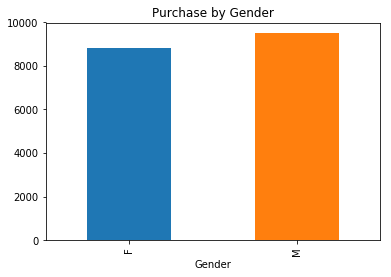

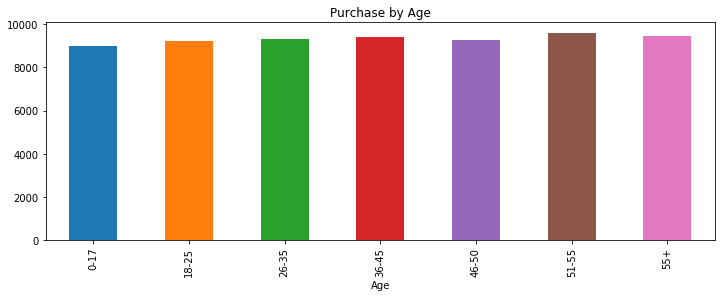

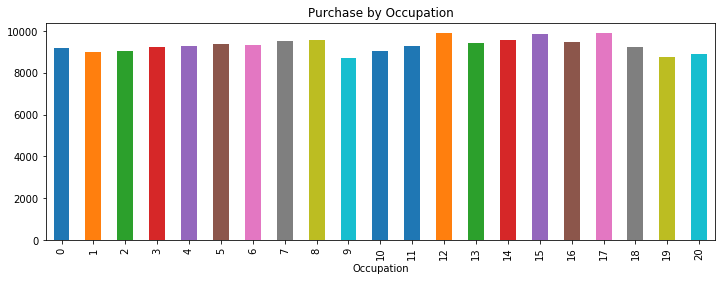

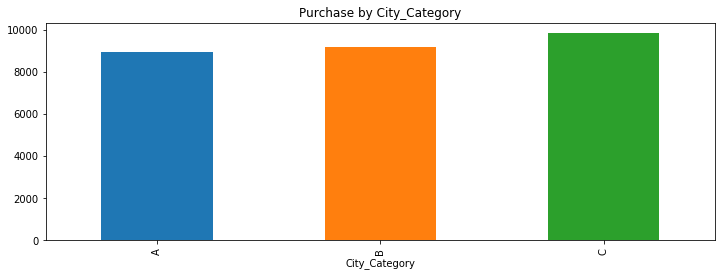

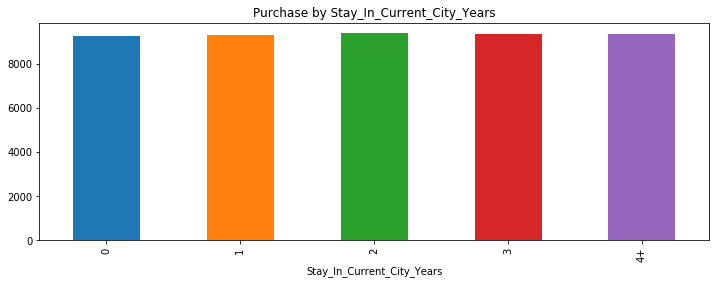

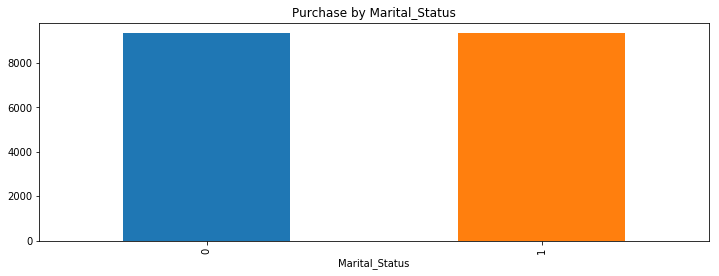

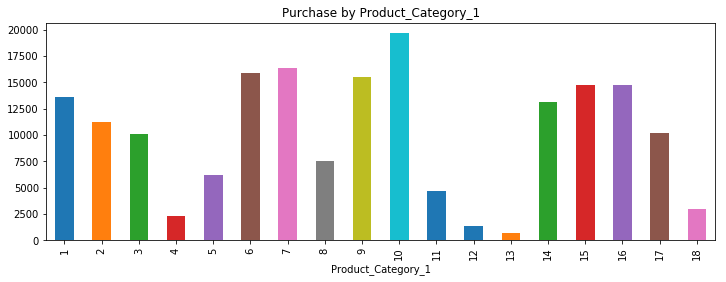

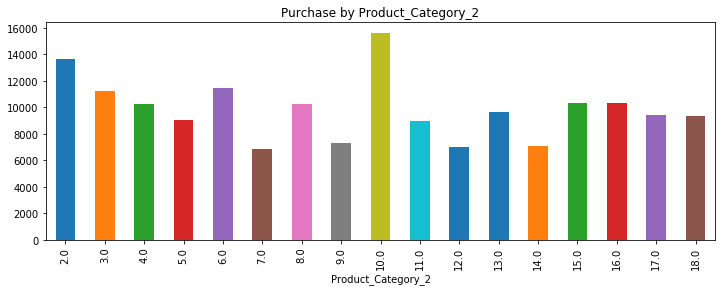

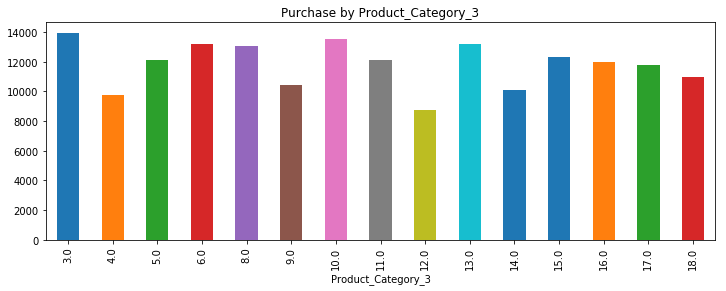

<Figure size 864x288 with 0 Axes>

In [7]:
 #visulize above , we can see there are not too many difference of the mean of the Purchase 
 #by 'Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years' and 'Marital_Status'
 
features=data.iloc[:, 2:11].columns   
for i in (data[features]):    
    data.groupby(i).Purchase.mean().plot(kind='bar', title='Purchase by %s' %i )
    plt.figure(figsize=(12,4))

Text(0.5,1,'Purchase in Occupation')

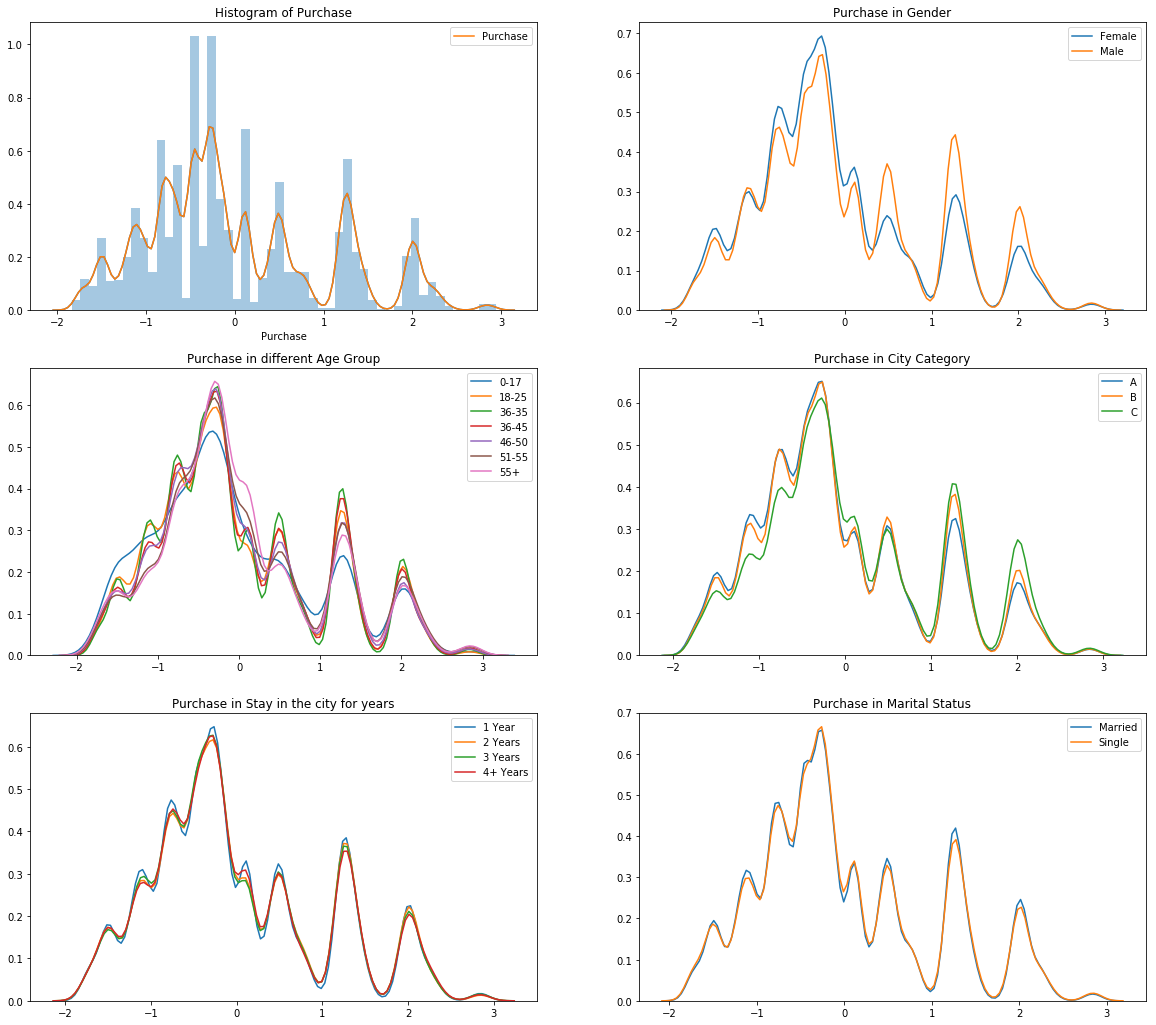

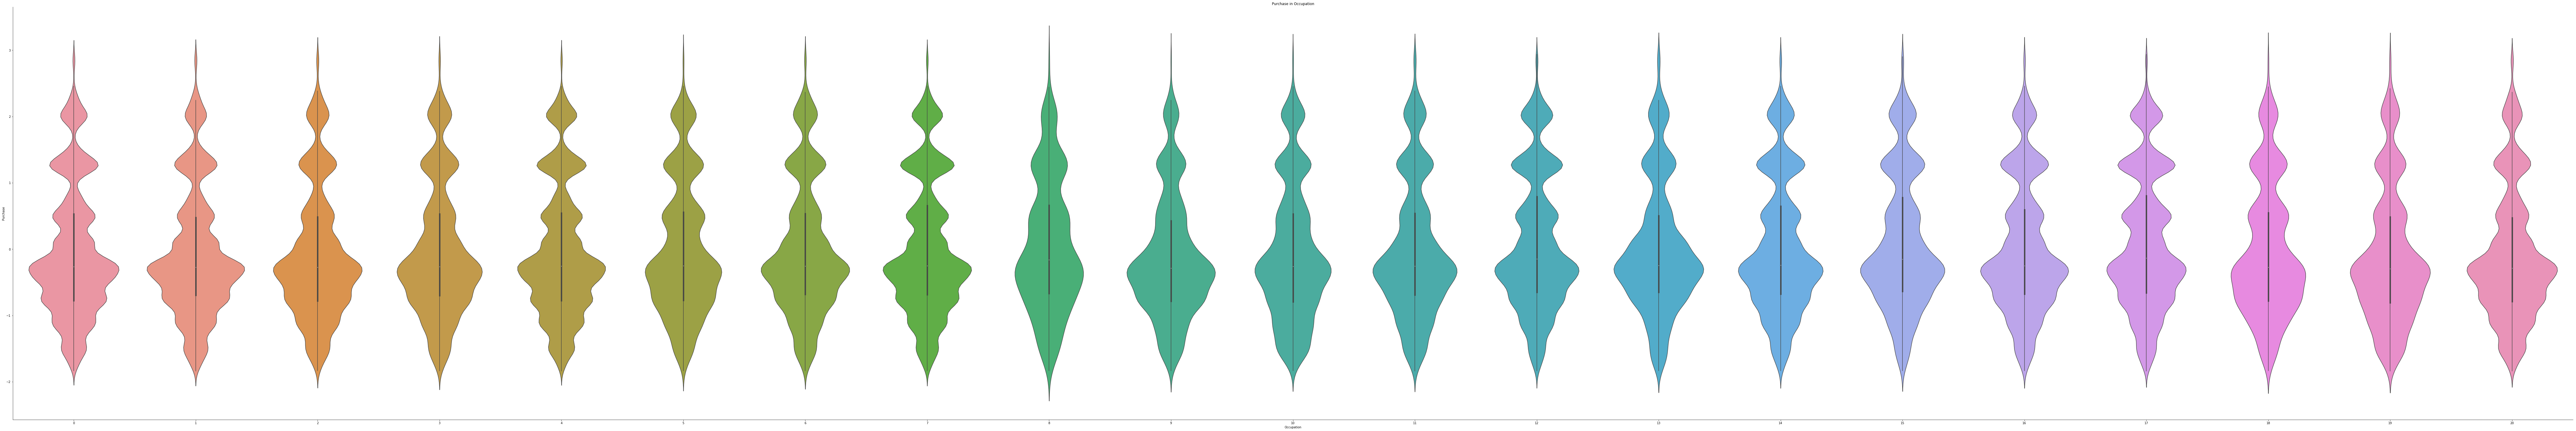

In [68]:
# visualizing the distribution of Purchase and Purchase distribution by different features
plt.figure(figsize=(20,18))

plt.subplot(321)
sns.distplot(data.Purchase)
sns.kdeplot(data.Purchase)
plt.title('Histogram of Purchase')

plt.subplot(322)
sns.kdeplot(data.Purchase[data.Gender == 'F'], label='Female')
sns.kdeplot(data.Purchase[data.Gender == 'M'], label='Male')
plt.title('Purchase in Gender')
plt.legend()
plt.subplot(323)
sns.kdeplot(data.Purchase[data.Age == '0-17'], label='0-17')
sns.kdeplot(data.Purchase[data.Age == '18-25'], label='18-25')
sns.kdeplot(data.Purchase[data.Age == '26-35'], label='36-35')
sns.kdeplot(data.Purchase[data.Age == '36-45'], label='36-45')
sns.kdeplot(data.Purchase[data.Age == '46-50'], label='46-50')
sns.kdeplot(data.Purchase[data.Age == '51-55'], label='51-55')
sns.kdeplot(data.Purchase[data.Age == '55+'], label='55+')
plt.title('Purchase in different Age Group')
plt.legend()
plt.subplot(324)
sns.kdeplot(data.Purchase[data.City_Category == 'A'], label='A')
sns.kdeplot(data.Purchase[data.City_Category == 'B'], label='B')
sns.kdeplot(data.Purchase[data.City_Category == 'C'], label='C')
plt.title('Purchase in City Category')
plt.subplot(325)
sns.kdeplot(data.Purchase[data.Stay_In_Current_City_Years == '1'], label='1 Year')
sns.kdeplot(data.Purchase[data.Stay_In_Current_City_Years == '2'], label='2 Years')
sns.kdeplot(data.Purchase[data.Stay_In_Current_City_Years == '3'], label='3 Years')
sns.kdeplot(data.Purchase[data.Stay_In_Current_City_Years == '4+'], label='4+ Years')
plt.title('Purchase in Stay in the city for years')
plt.subplot(326)
sns.kdeplot(data.Purchase[data.Marital_Status == 0], label='Married')
sns.kdeplot(data.Purchase[data.Marital_Status == 1], label='Single')
plt.title('Purchase in Marital Status')
plt.legend()

sns.catplot(x='Occupation',y='Purchase' , height= 20, aspect=6, kind='violin', data=data)
plt.title('Purchase in Occupation')

# ANOVA

In [22]:
#Analyse Purchase by ANOVA
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# we pick up the all independent variables except'Product_Category_2' and 'Product_Category_3' to avoid multiple collinarity in the model
formula = 'Purchase ~ C(Gender) + C(Age) + C(Occupation)+ C(City_Category) + C(Stay_In_Current_City_Years)+C(Marital_Status)+C(Product_Category_1)'
model = ols(formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)
print(model.summary())

                                     sum_sq        df             F  \
C(Gender)                      2.372146e+08       1.0     25.919729   
C(Age)                         7.241551e+09       6.0    131.877123   
C(Occupation)                  7.994999e+09      20.0     43.679485   
C(City_Category)               2.619930e+10       2.0   1431.359733   
C(Stay_In_Current_City_Years)  1.622727e+08       4.0      4.432764   
C(Marital_Status)              3.326270e+08       1.0     36.345165   
C(Product_Category_1)          8.265377e+12      17.0  53125.478600   
Residual                       4.919371e+12  537525.0           NaN   

                                      PR(>F)  
C(Gender)                       3.560327e-07  
C(Age)                         1.585963e-167  
C(Occupation)                  4.590614e-172  
C(City_Category)                0.000000e+00  
C(Stay_In_Current_City_Years)   1.392904e-03  
C(Marital_Status)               1.653959e-09  
C(Product_Category_1)          

# RandomForestClassifier

In [185]:
#Now we want to classify the 'Product_Category' by using RandomForestClassifier
#First we change the string to numbers and standardize Purchase

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data['Gender_N']=data.Gender.map({'F':0,'M':1})
data['Age_N']=data.Age.map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})
data['City_Category_N']=data.City_Category.map({'A':0,'B':1,'C':2})
data['Stay_In_Current_City_Years_N']=data.Stay_In_Current_City_Years.map({'0':0,'1':1,'2':2,'3':3,'4+':4})

std_X=StandardScaler()
data['Purchase']=std_X.fit_transform(data.Purchase.values.reshape(-1,1))

# Trainding set adn test set split
X = data.iloc[:,[4,7,11,12,13,14,15]] 
y = data.iloc[:, 8]
x_train,x_test,y_train,y_test=train_test_split(X,y, random_state=100, test_size=0.1)


# use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [163]:
#predict and check the model accuracy
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
print('RandomForestClassifier Accuracy is :' ,accuracy_score(y_test,y_pred)*100)

RandomForestClassifier Accuracy is : 81.72551062167491


In [164]:
print(clf.predict_proba(x_test)[10:20])
print(y_test[10:20])

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]
361753    1
531758    2
308768    3
66680     1
275973    5
65844     8
54343     5
225399    1
506199    5
238823    8
Name: Product_Category_1, dtype: int64


# Visualizing the features

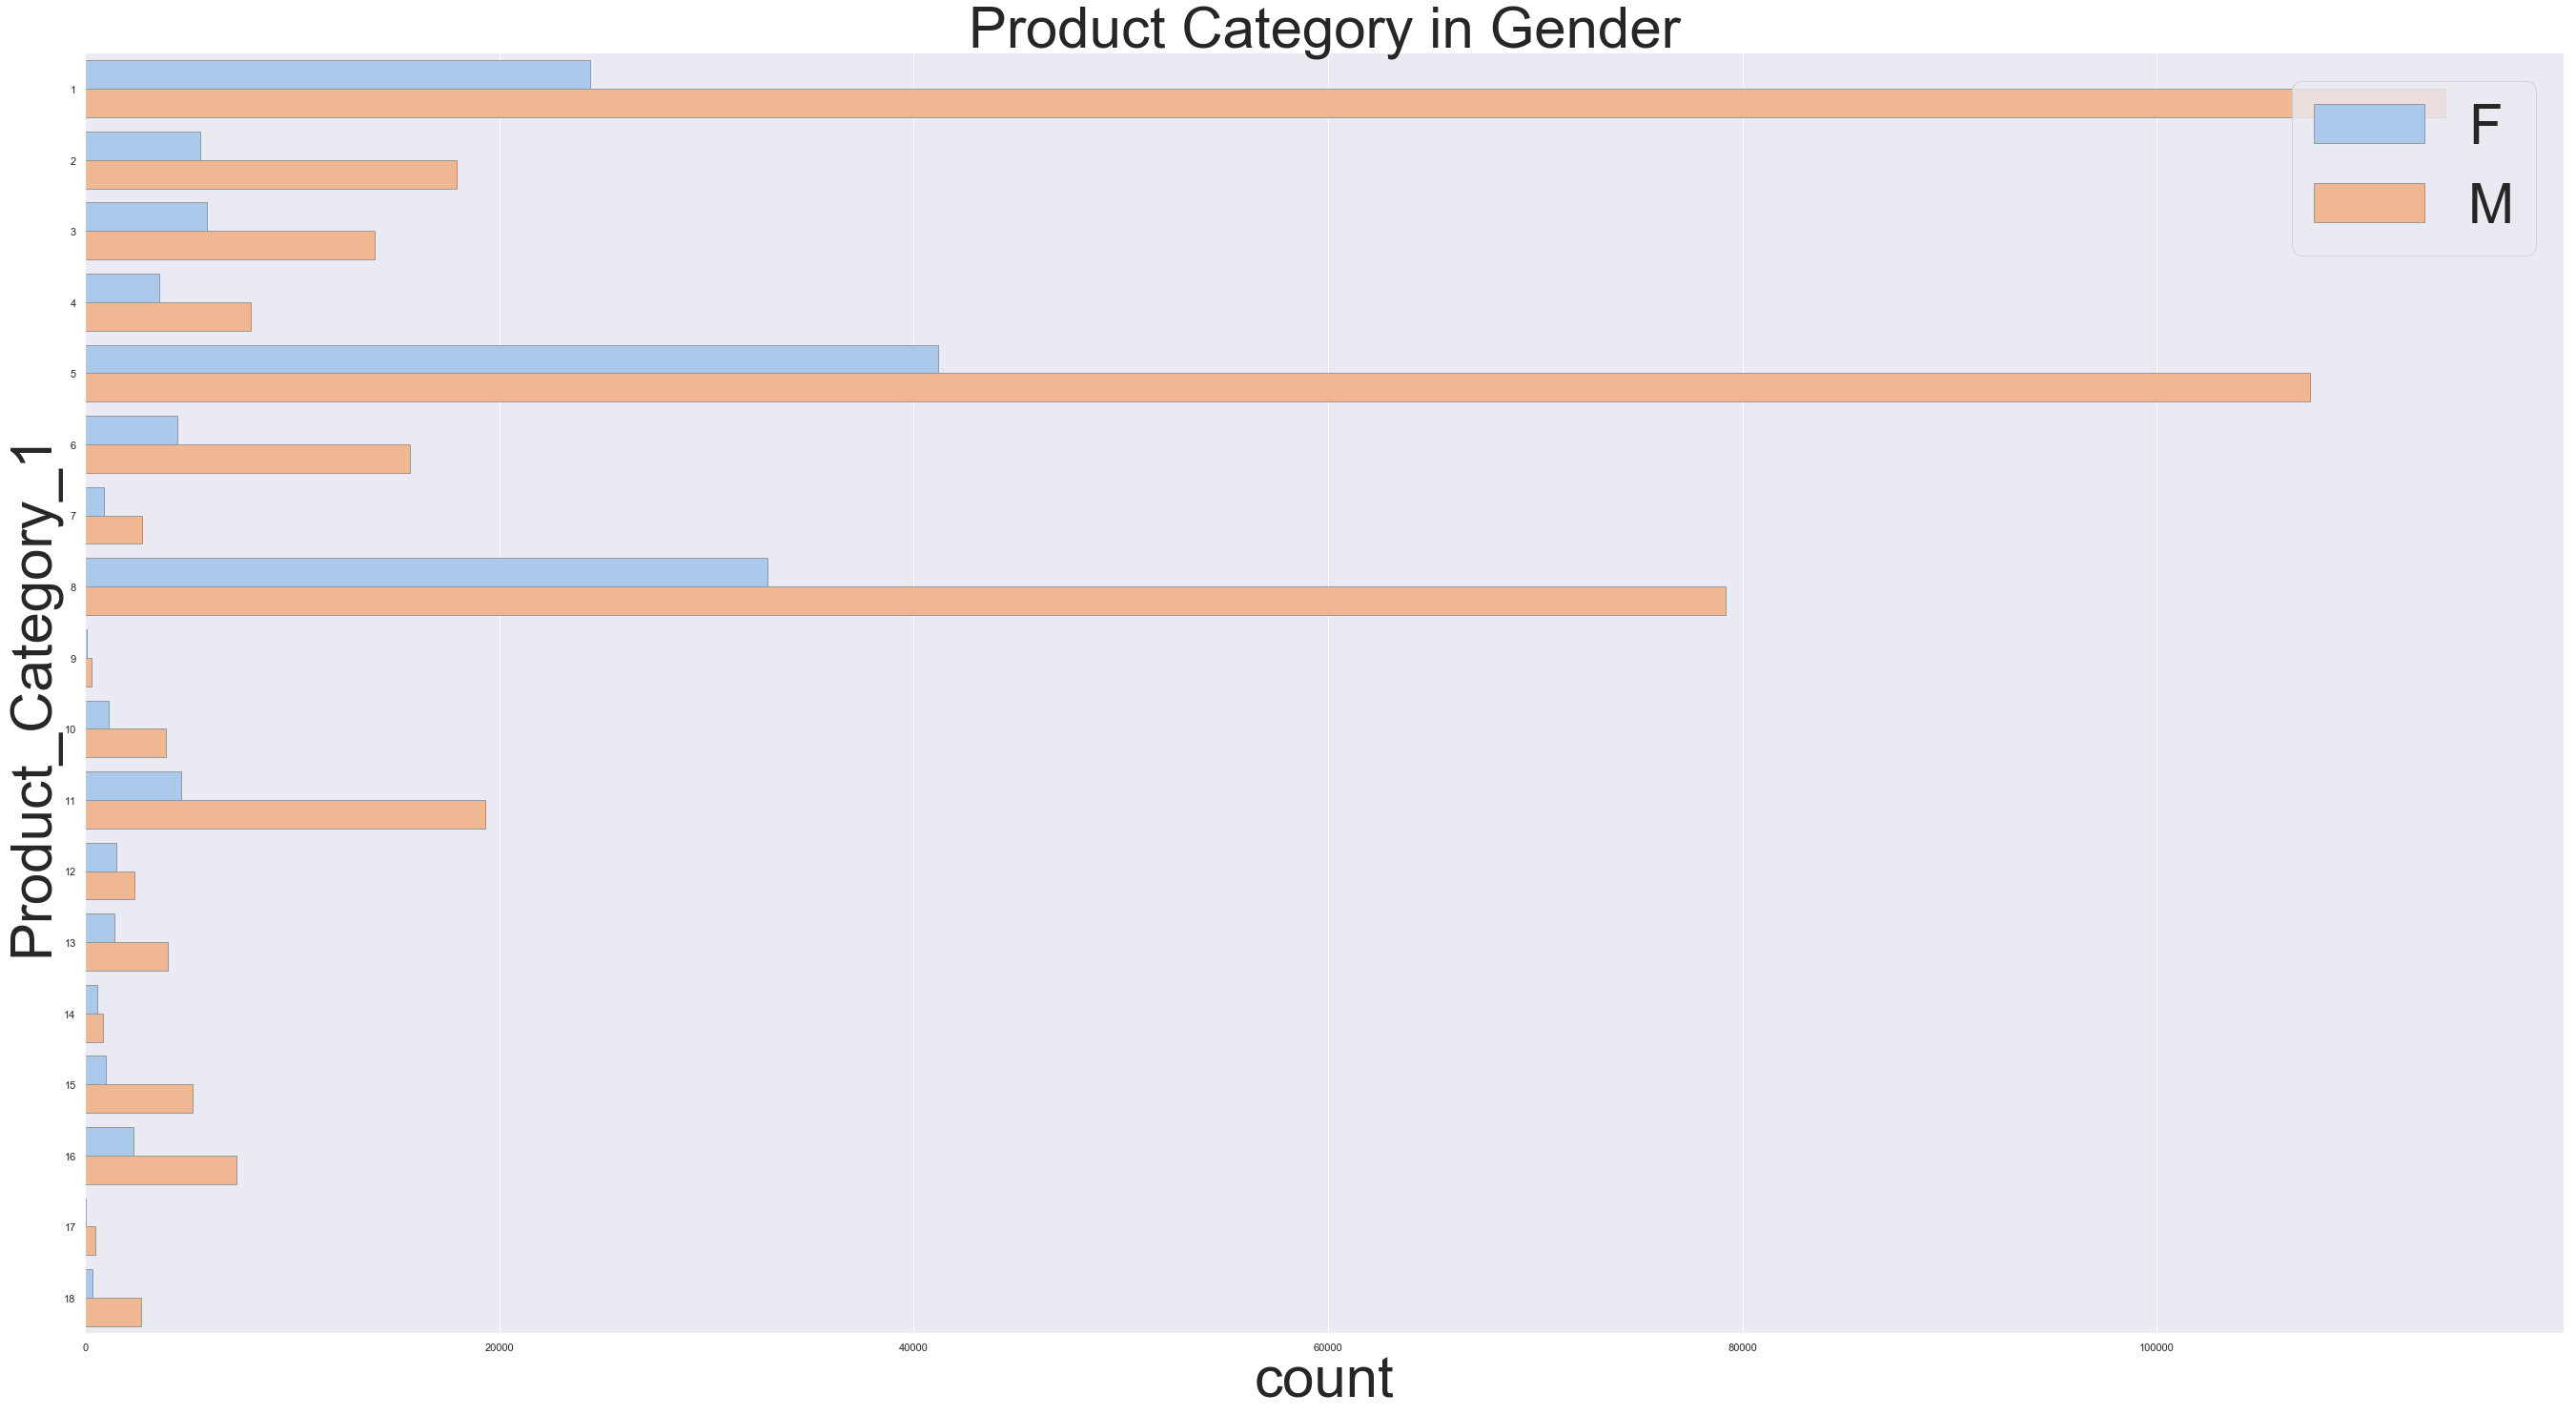

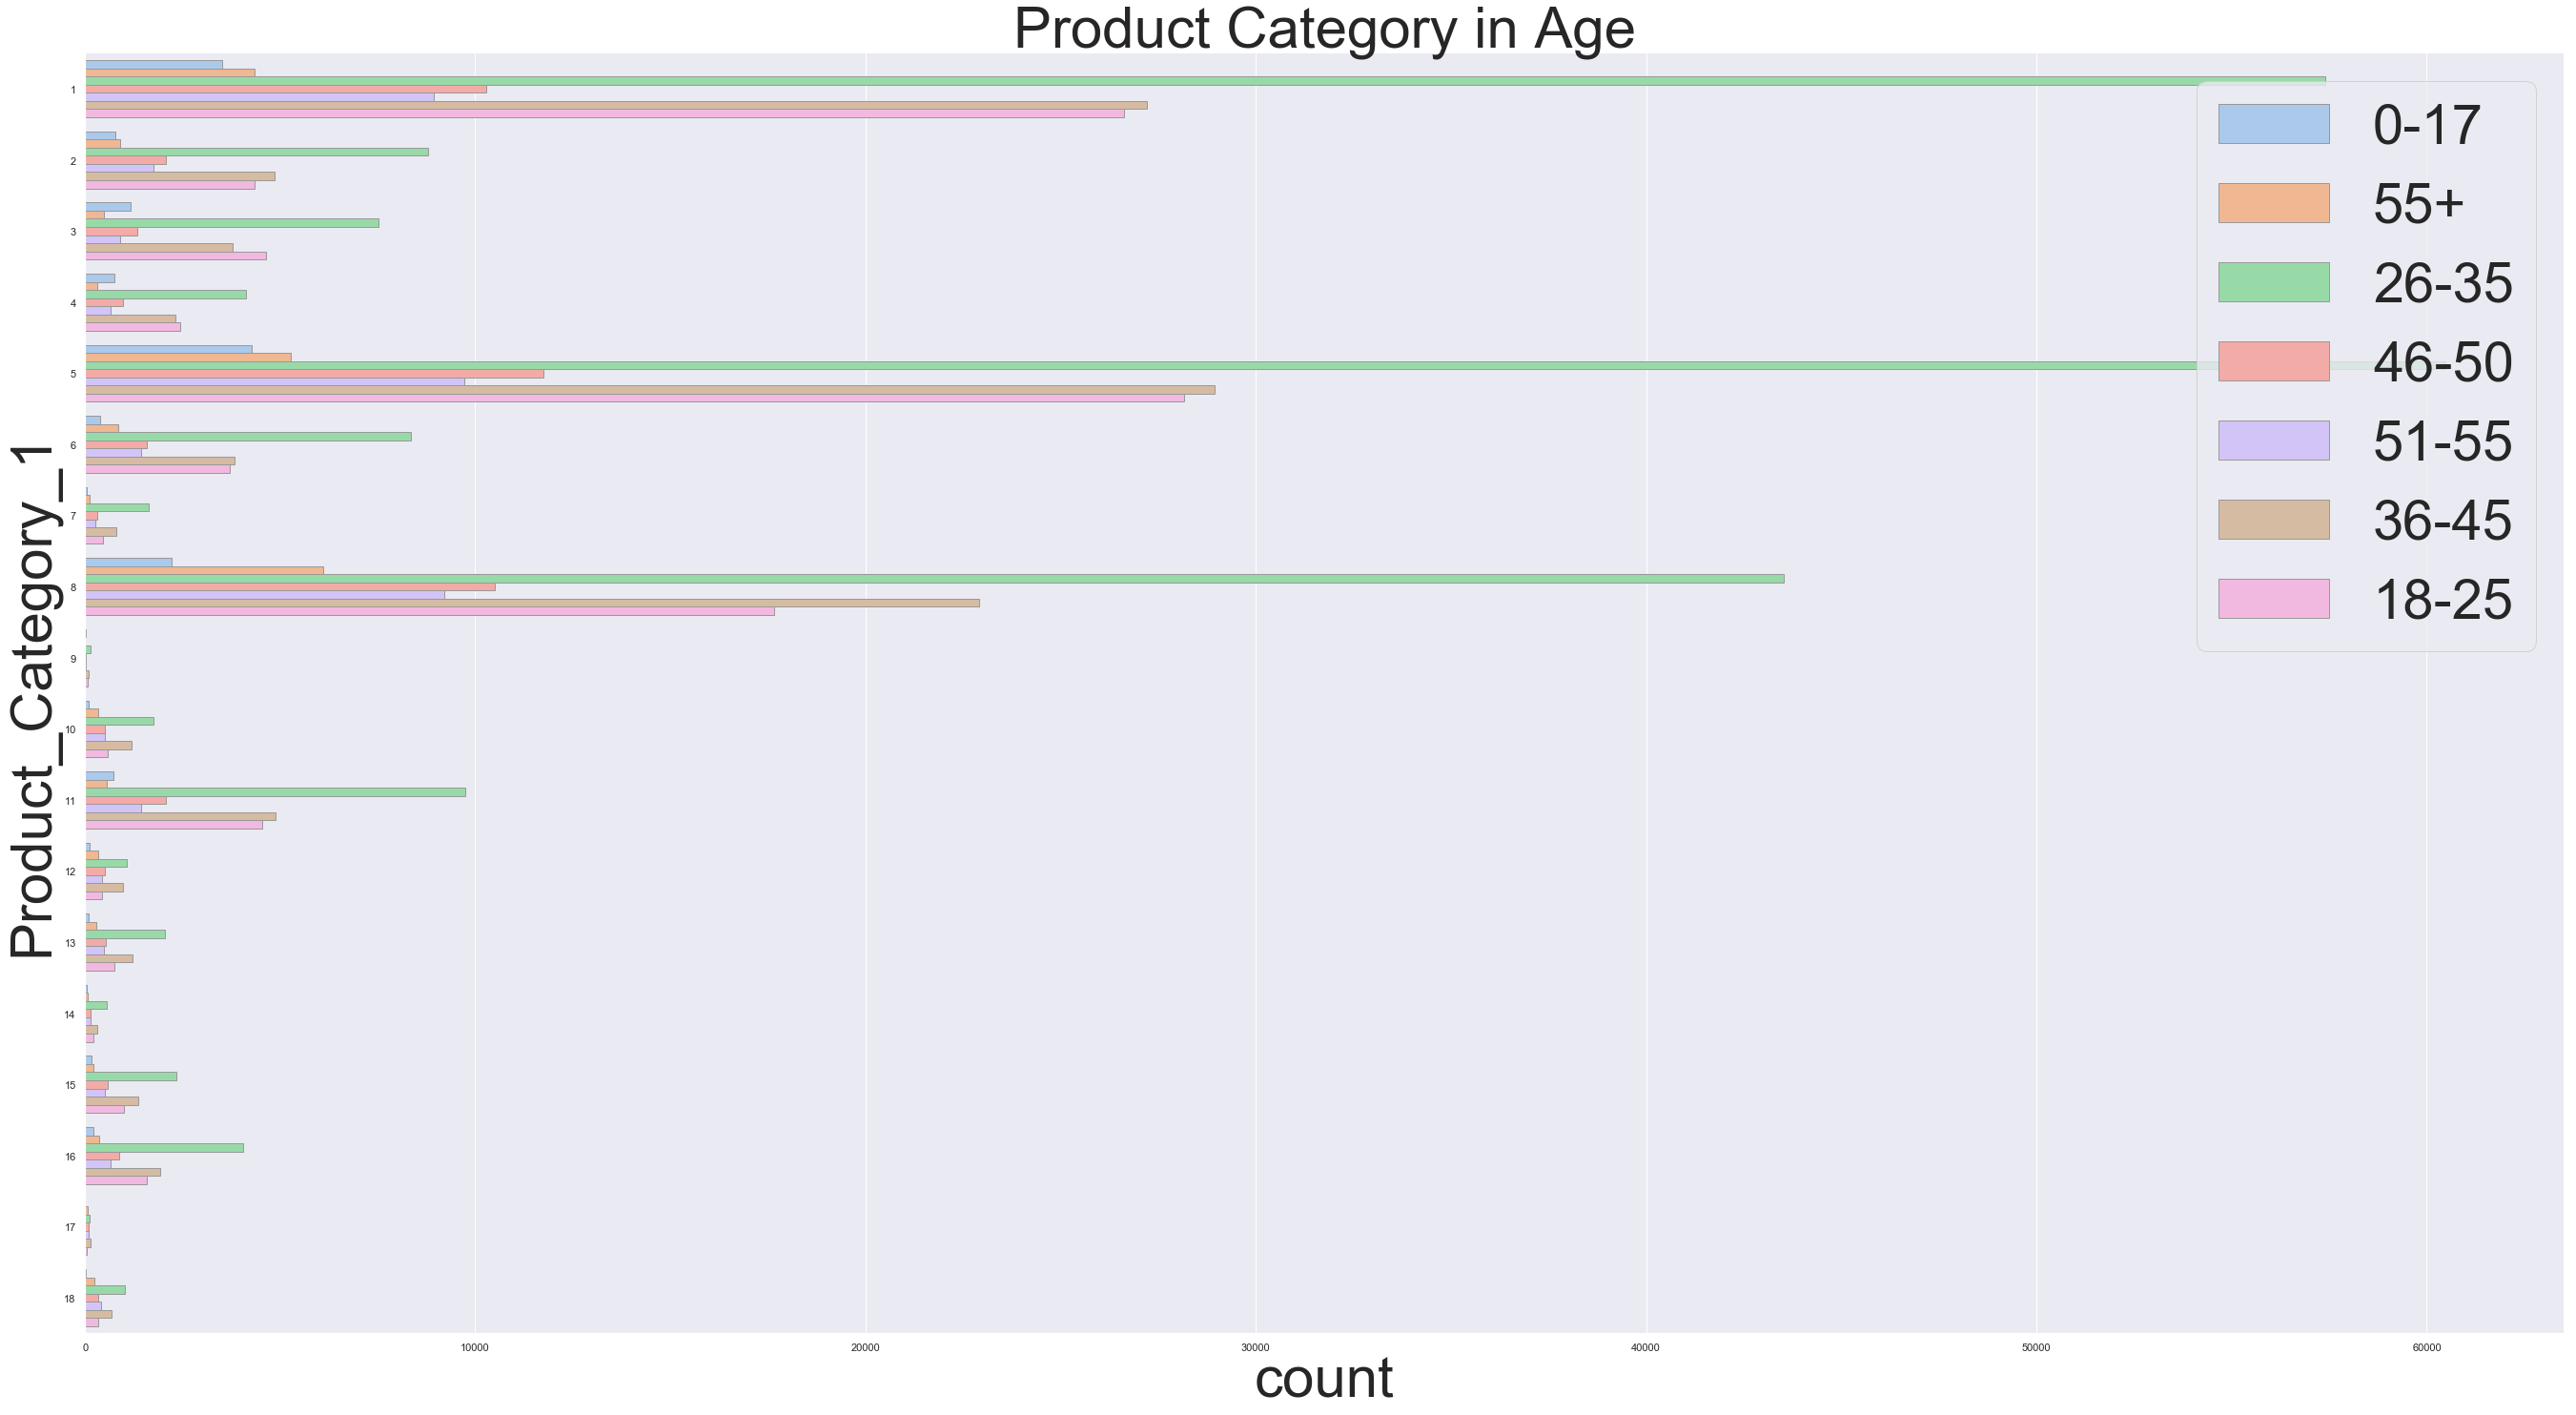

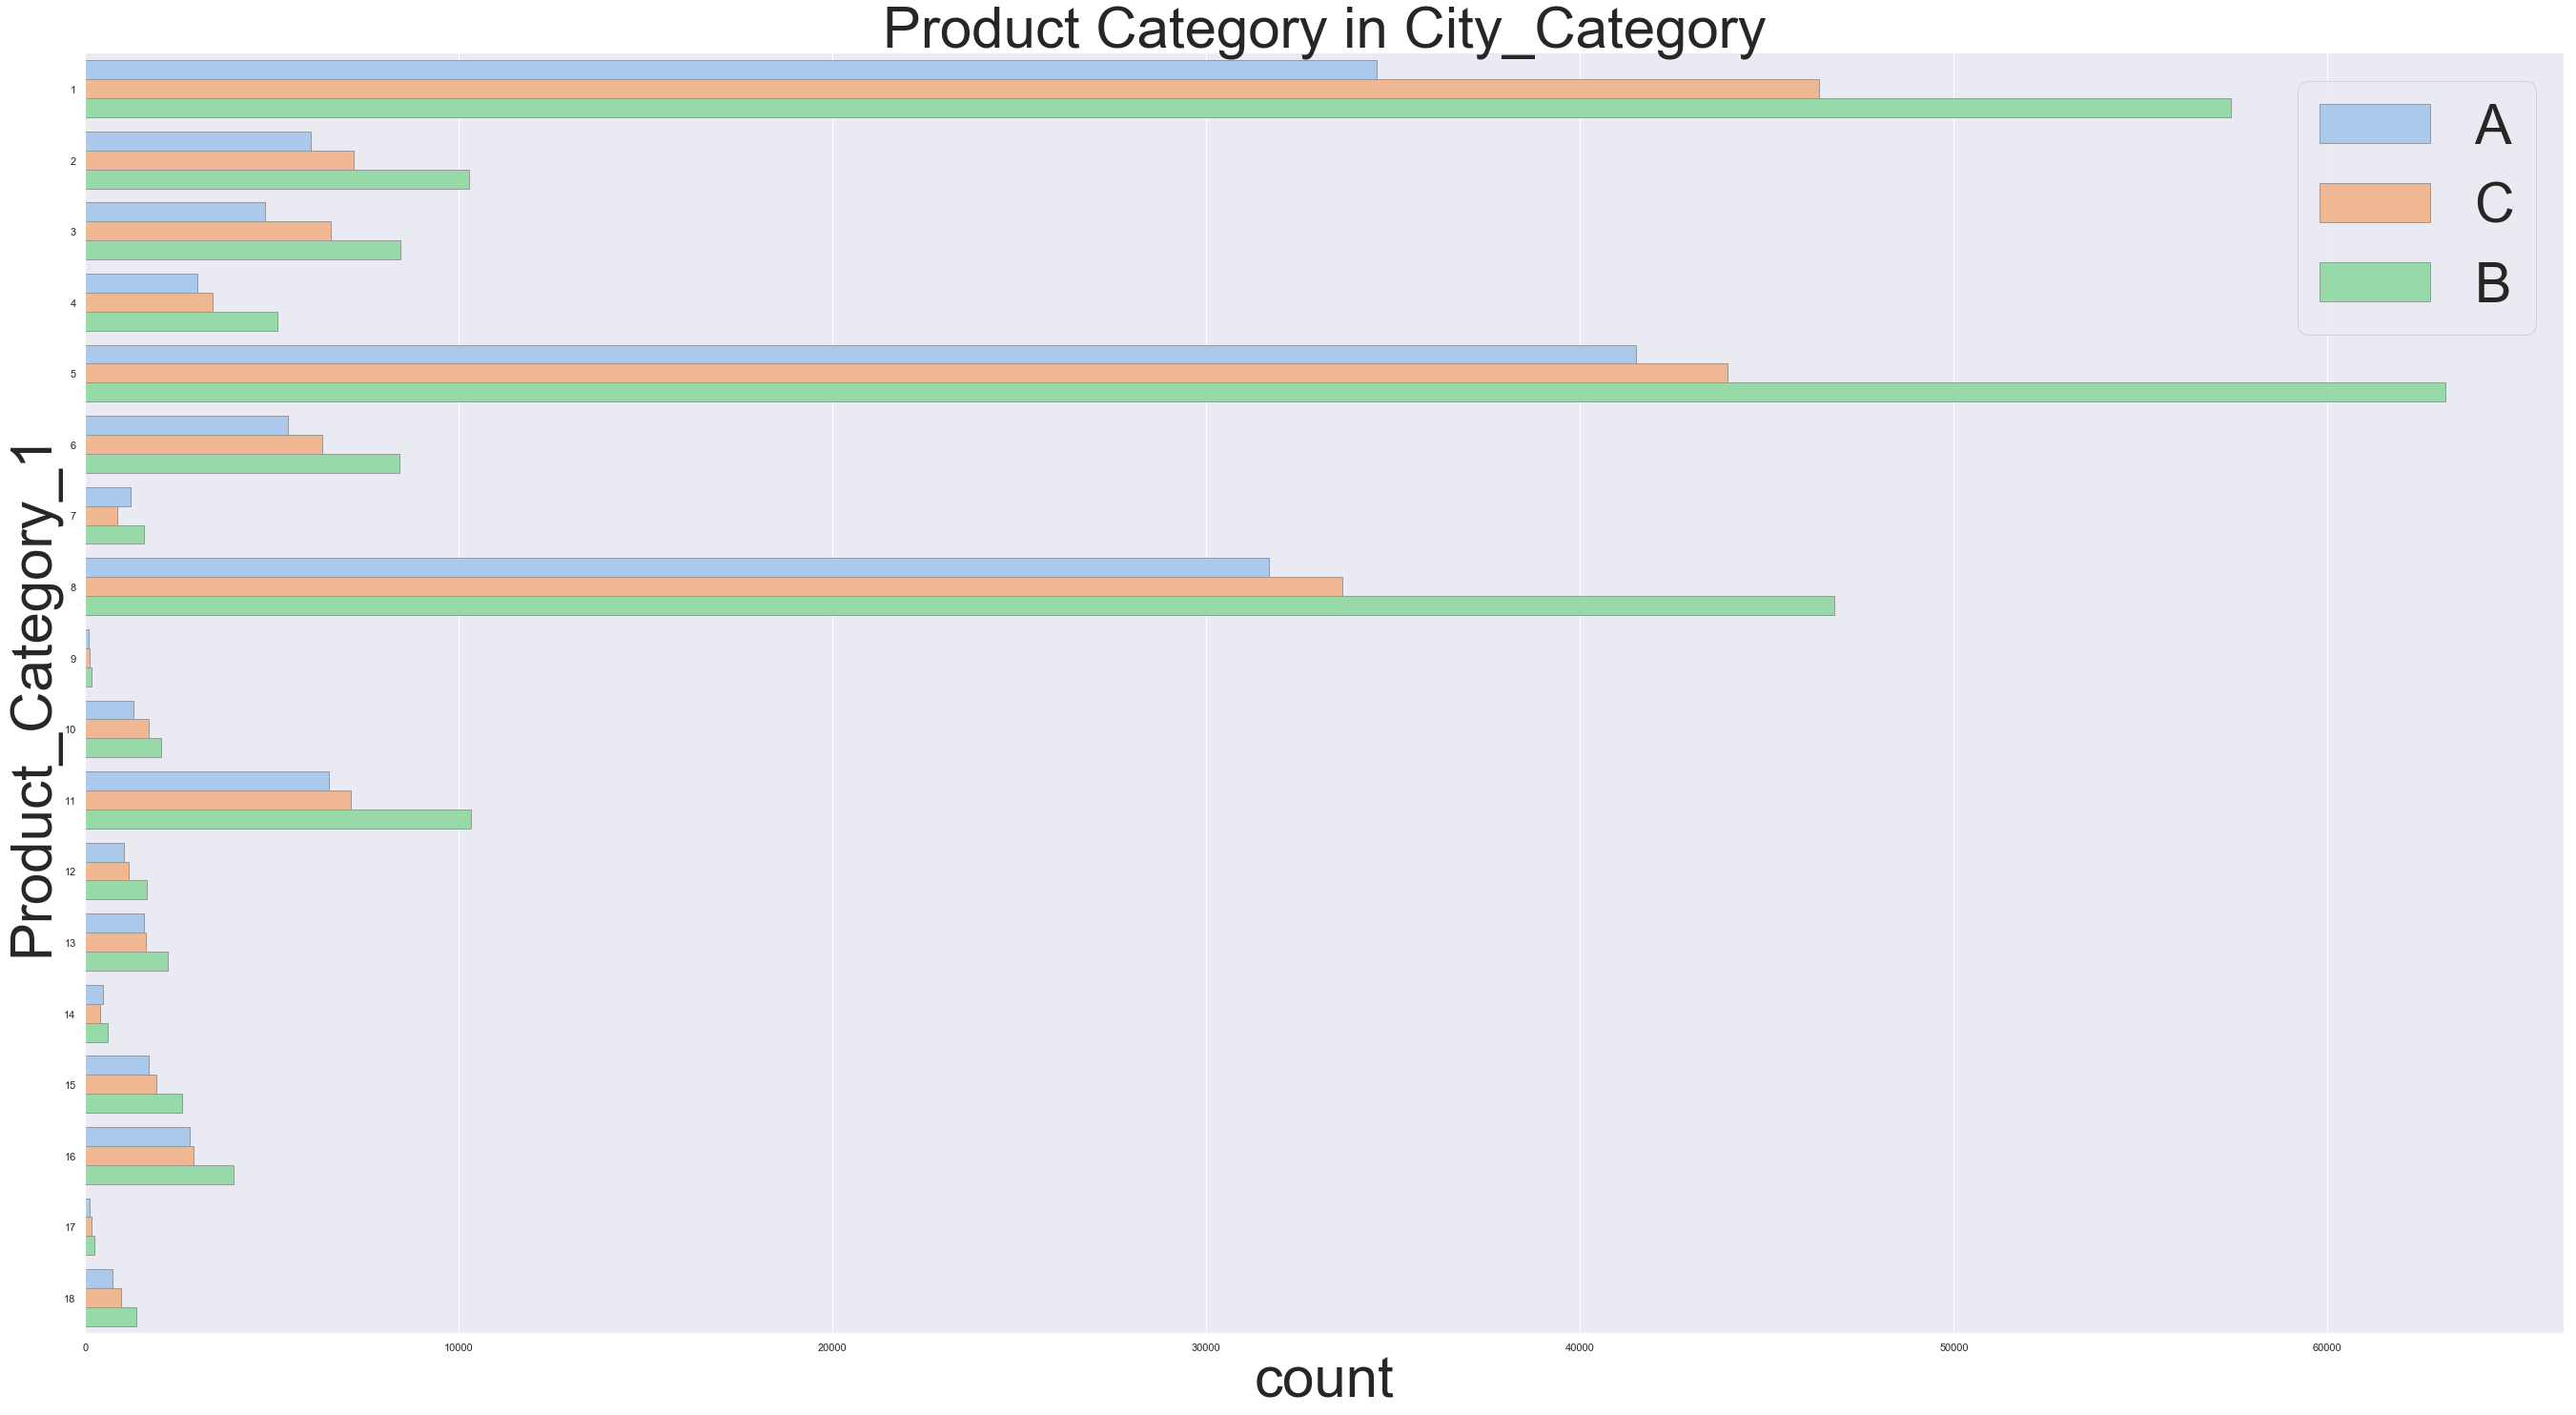

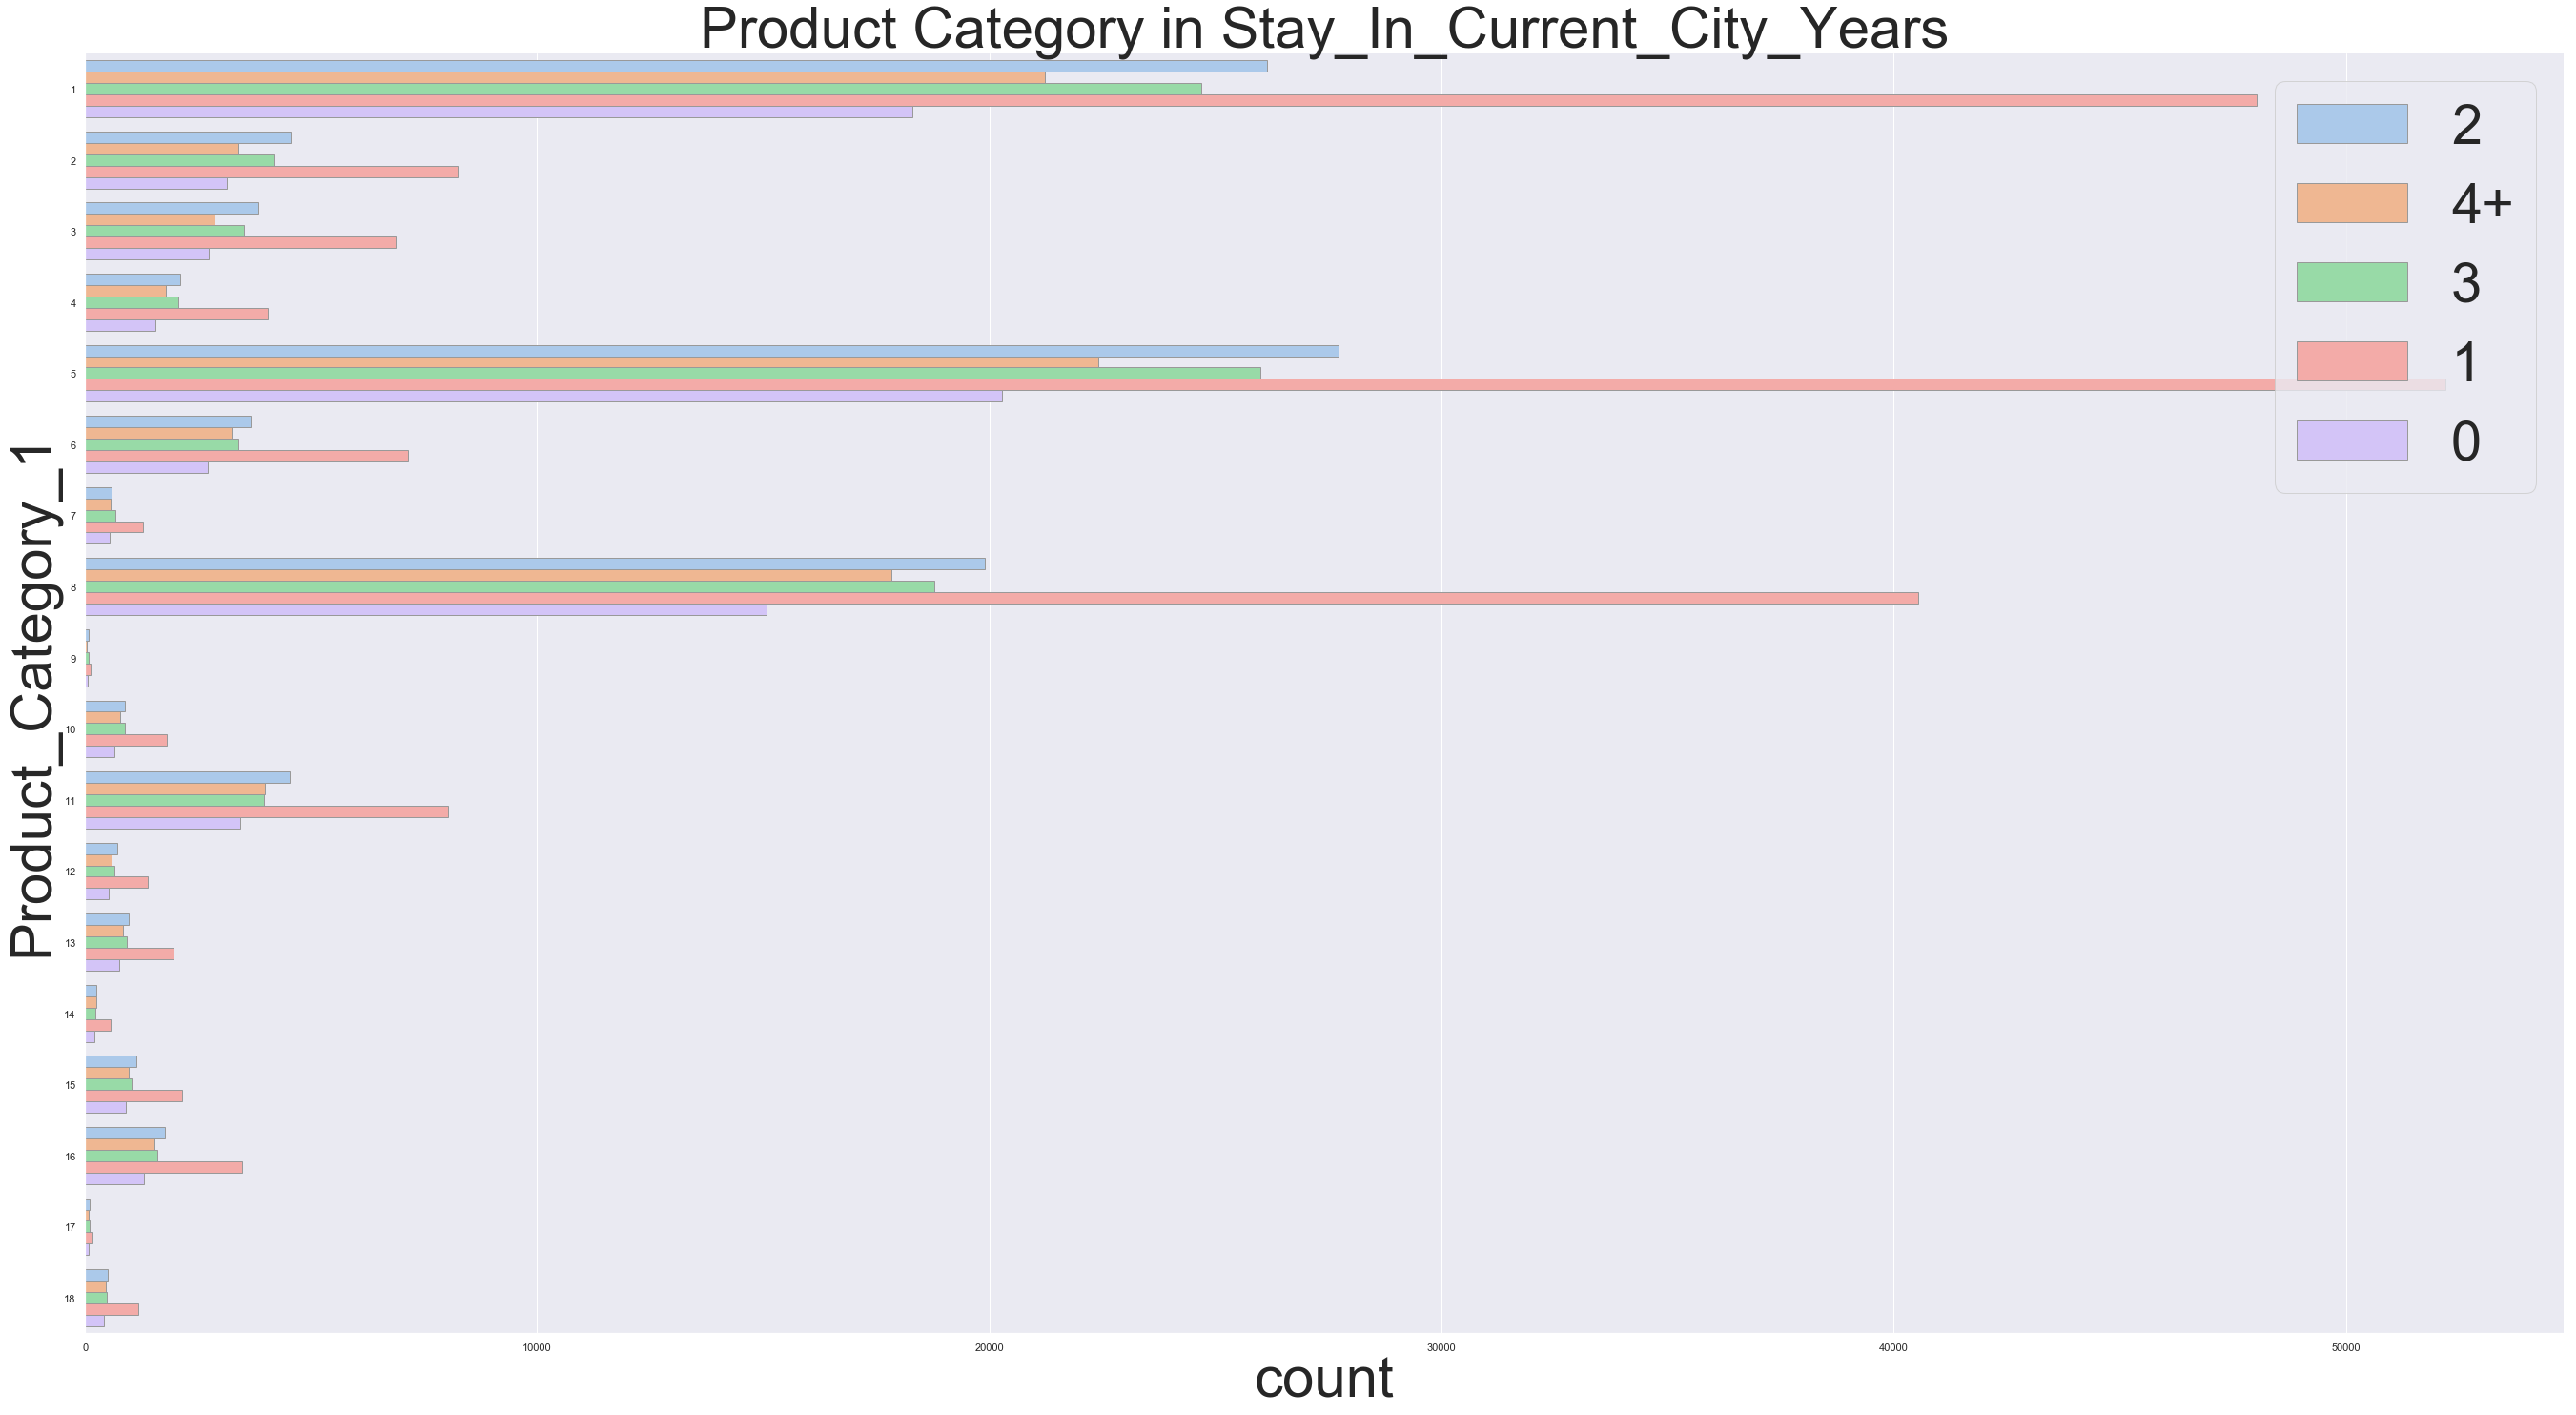

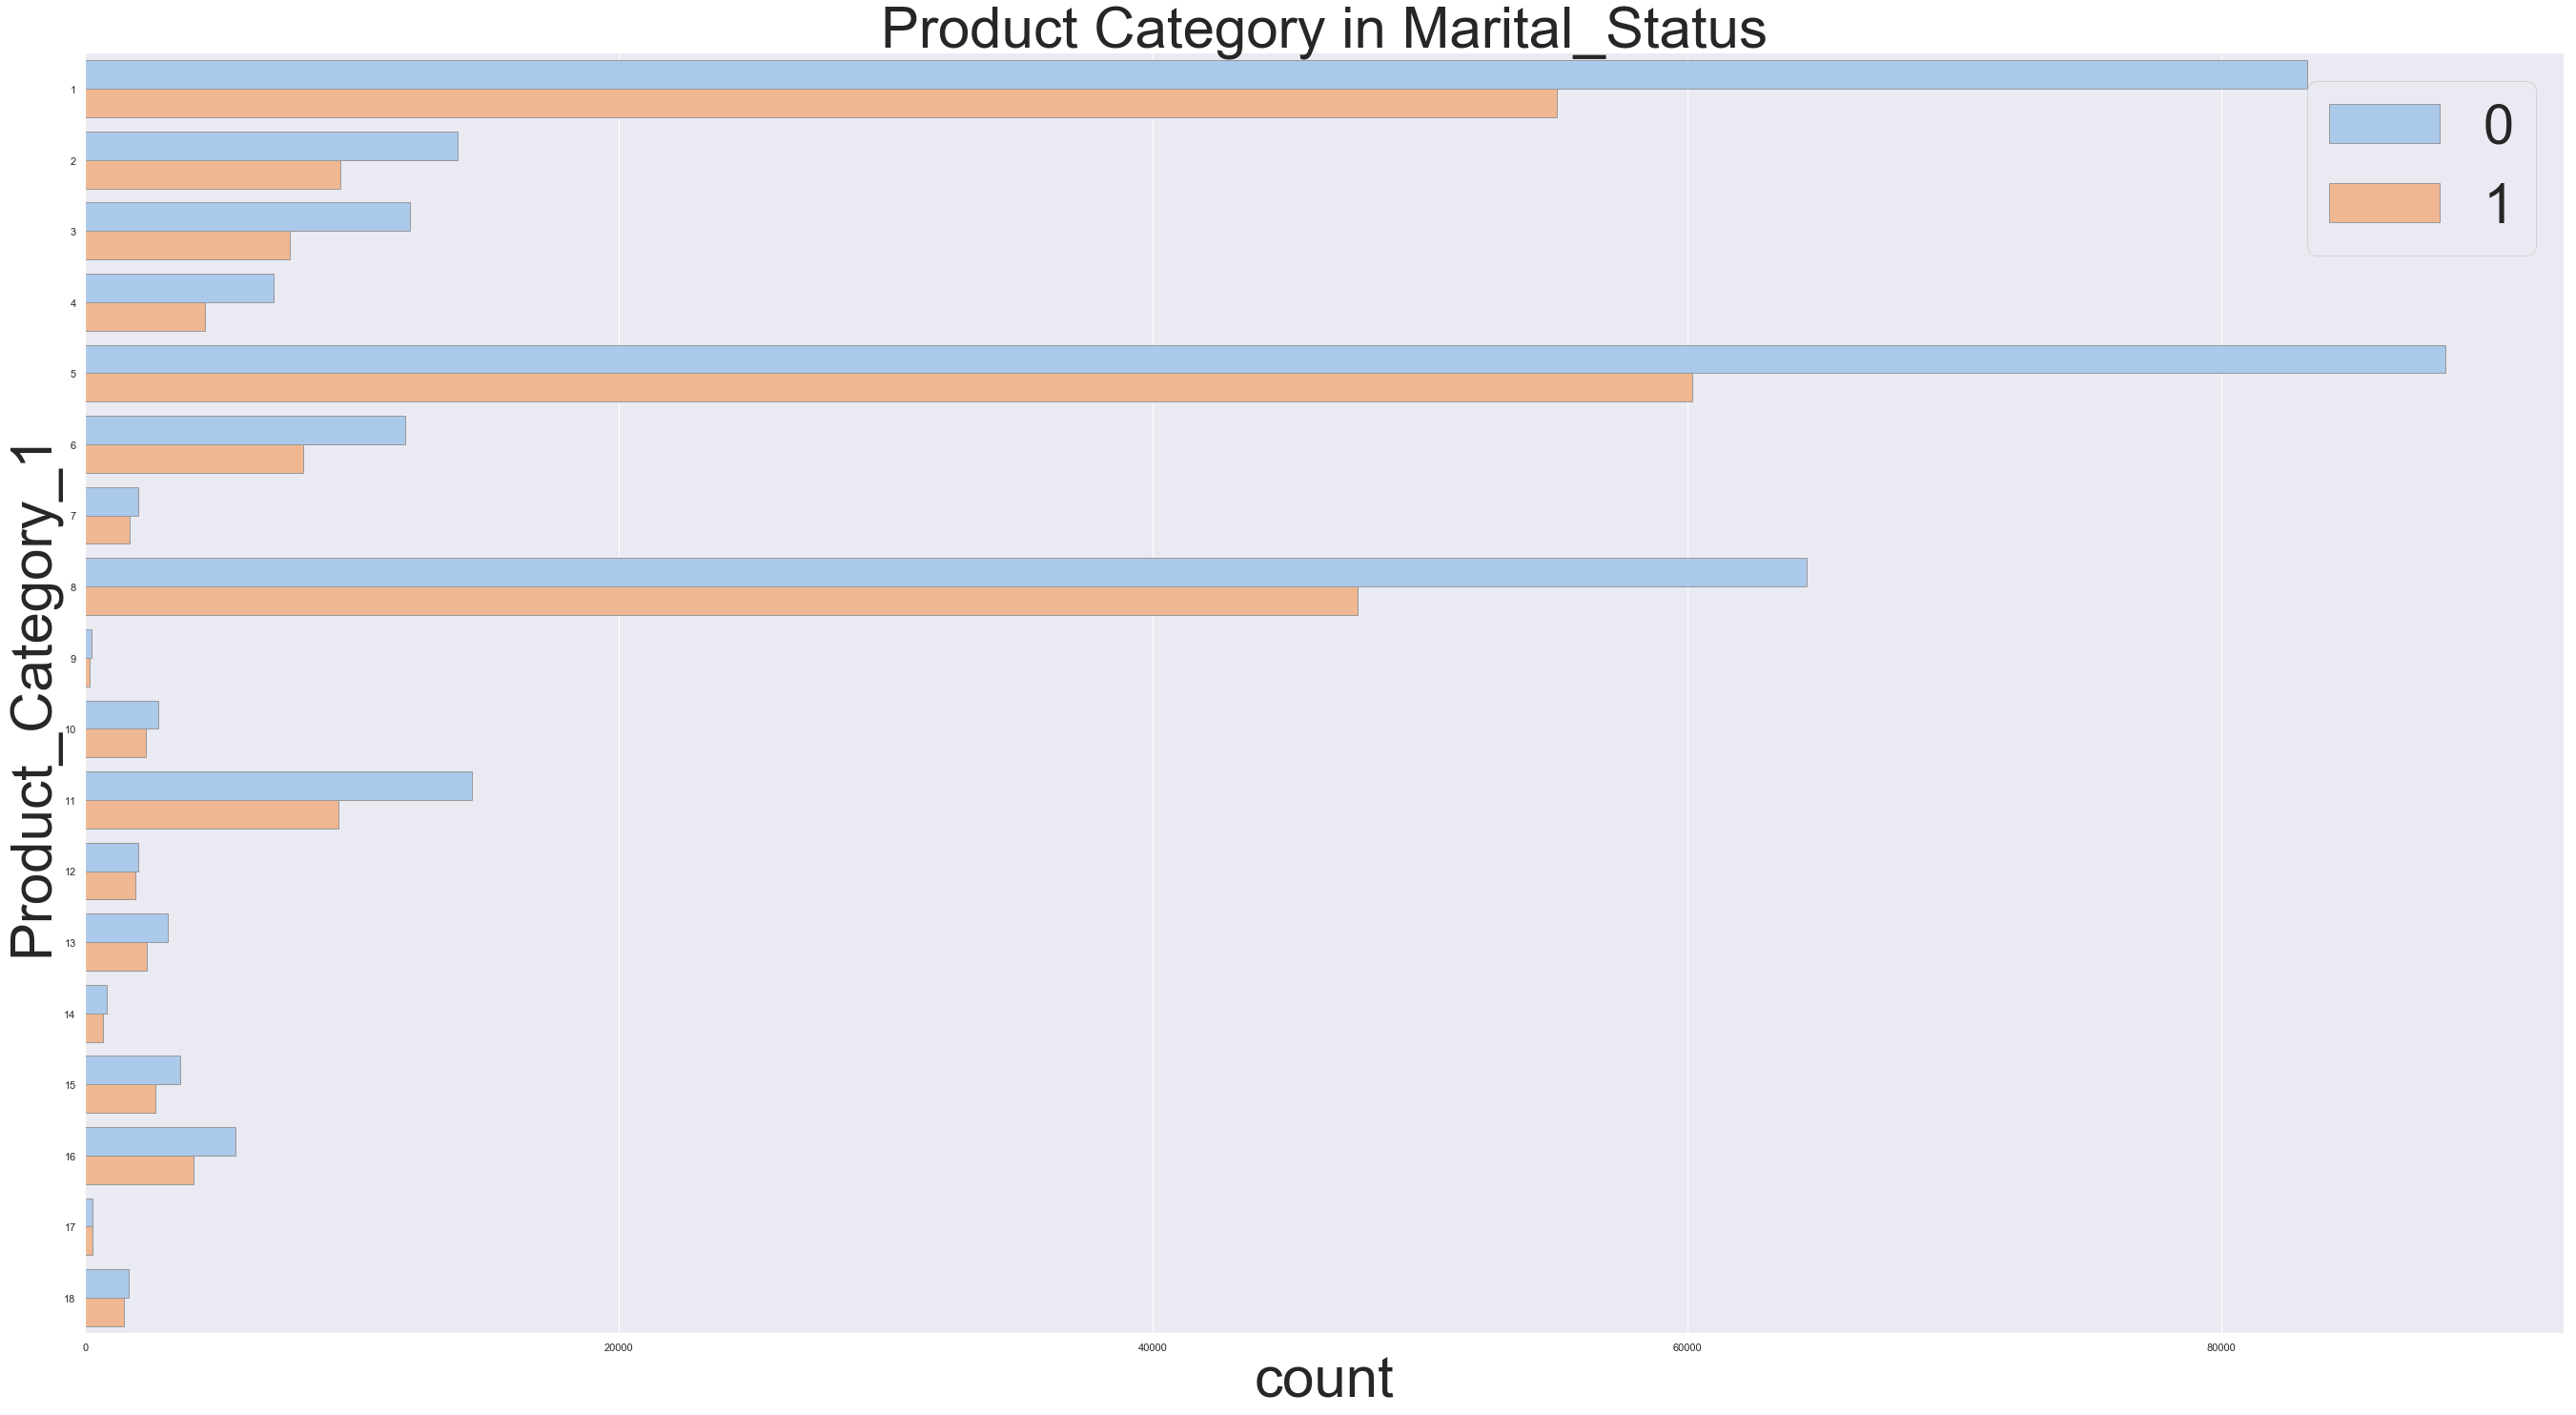

In [129]:
sns.set(rc={'font.size':100,'axes.labelsize':60})

j=data.iloc[:,[2,3,5,6,7]].columns

for i in (data[j]):

 sns.catplot(y='Product_Category_1',hue=i ,kind="count",palette="pastel",legend_out=False, edgecolor=".6",height=22,aspect=22/12, data=data)
 plt.title('Product Category in %s' %i, {'fontsize':60})
 plt.legend(fontsize='xx-small',loc=1)


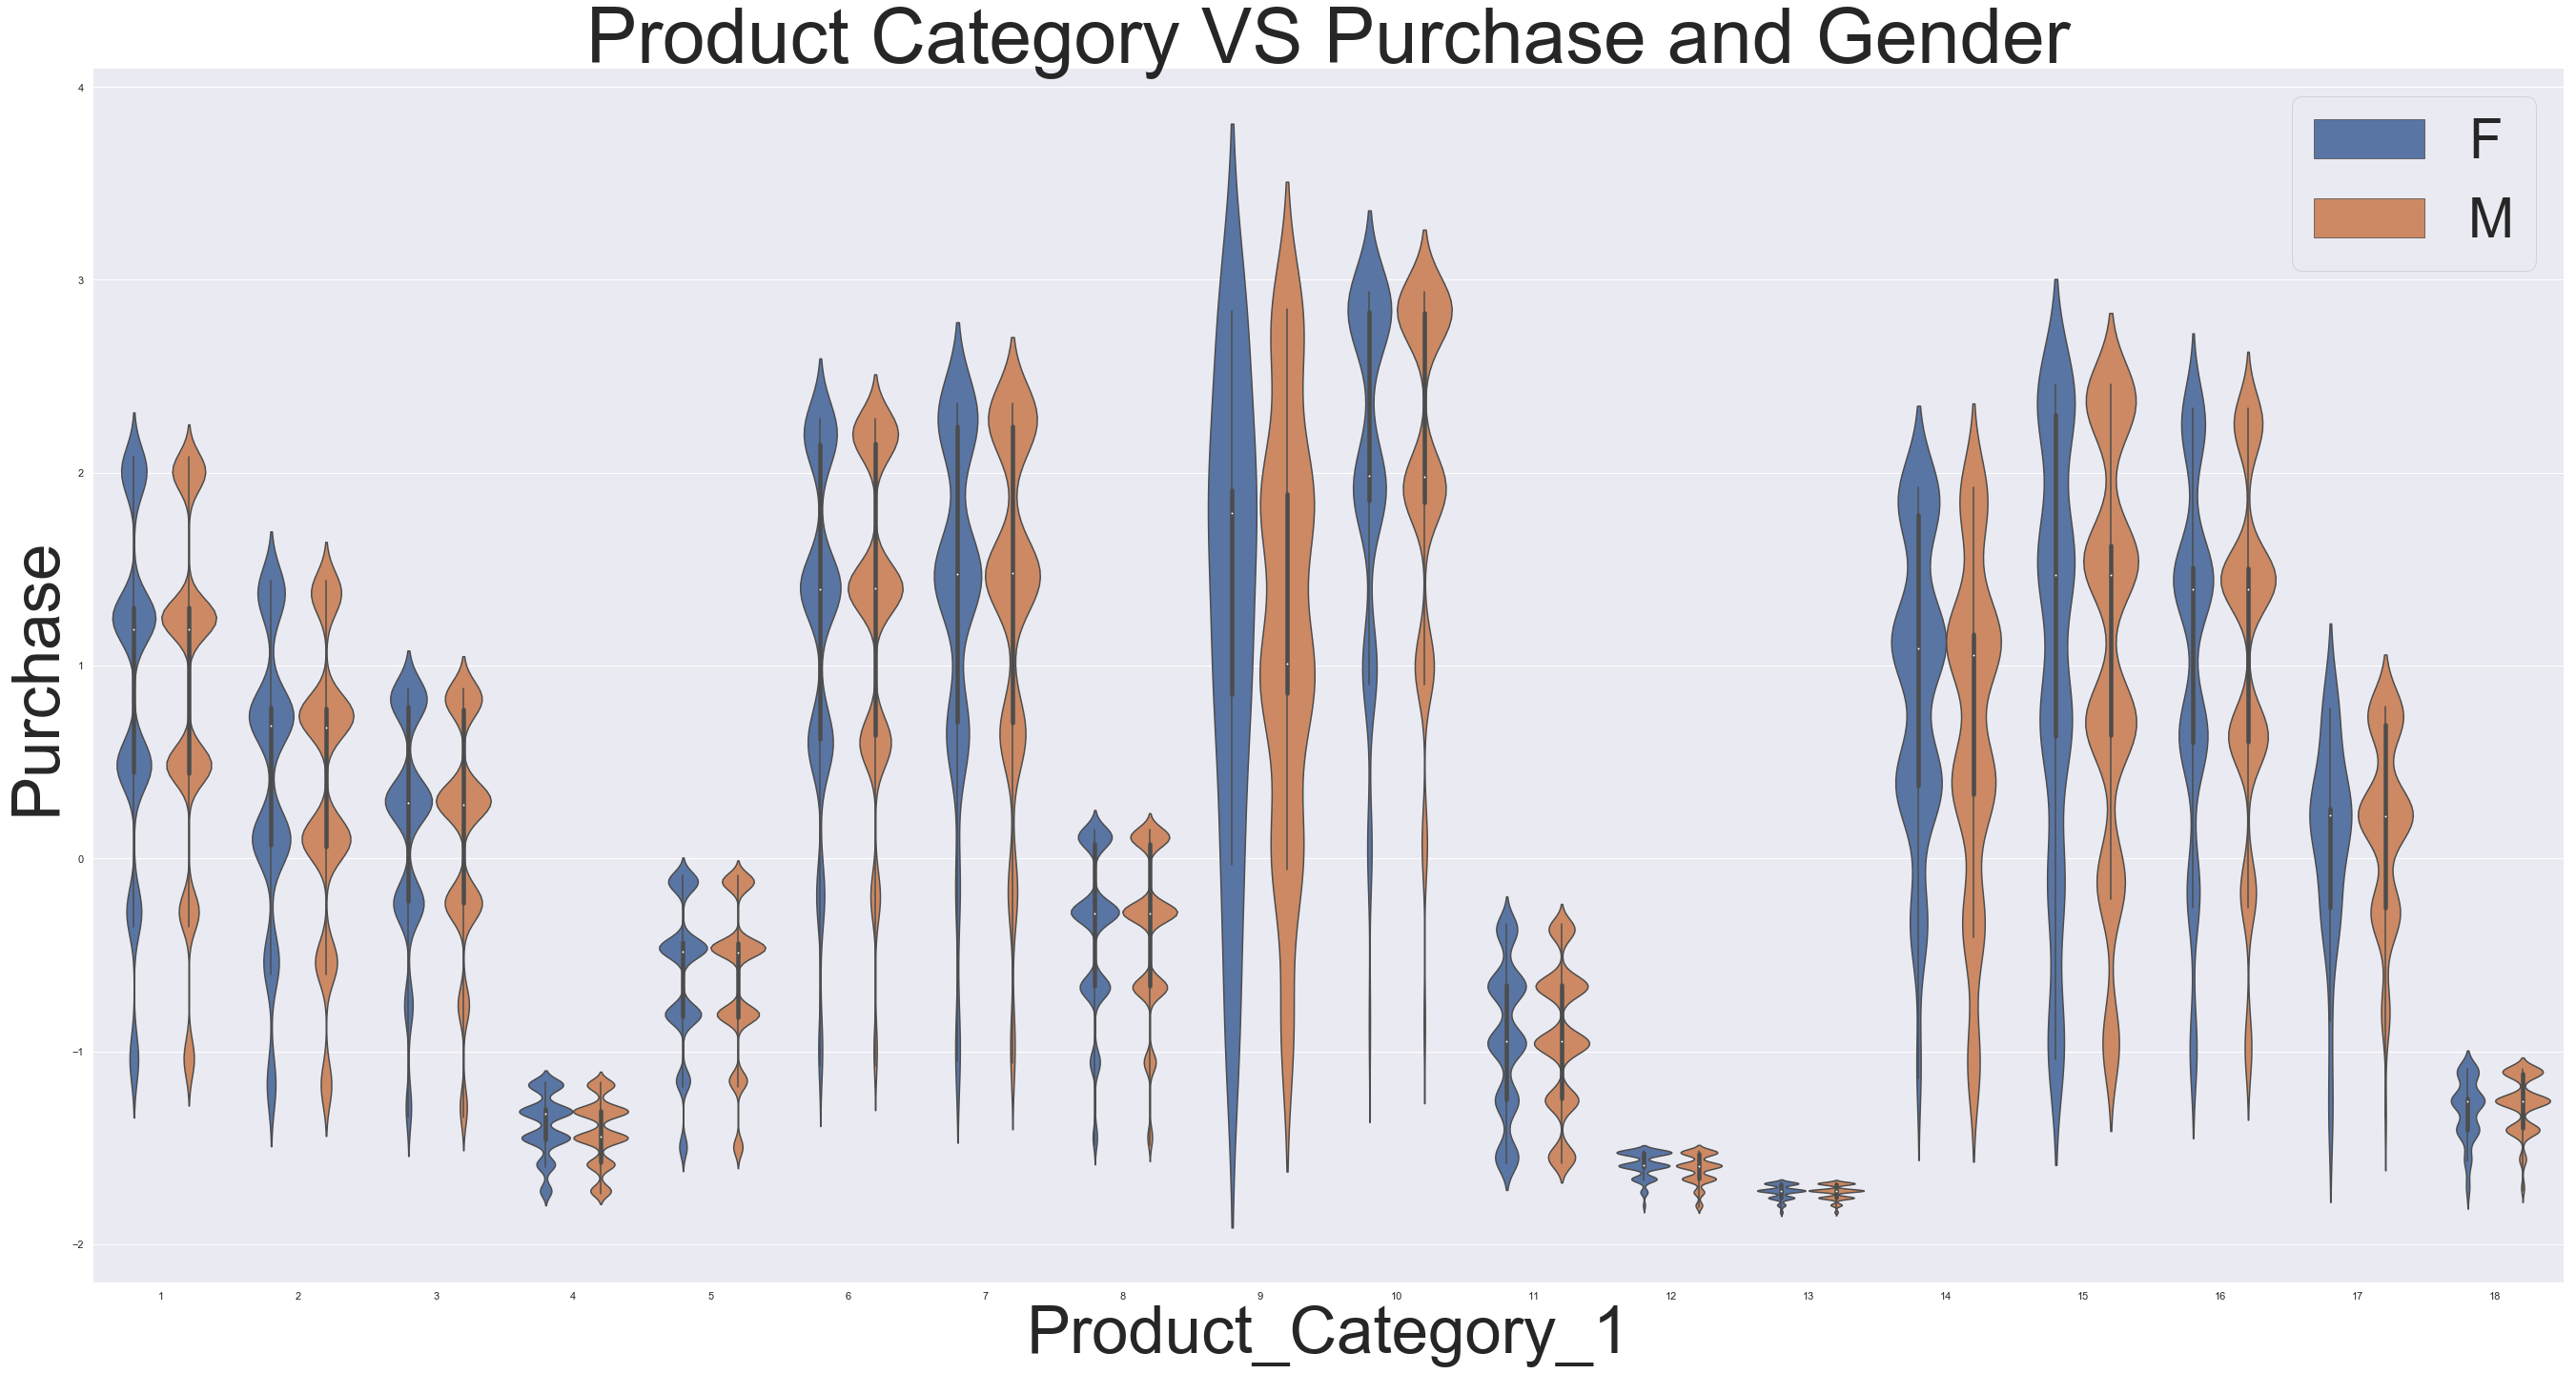

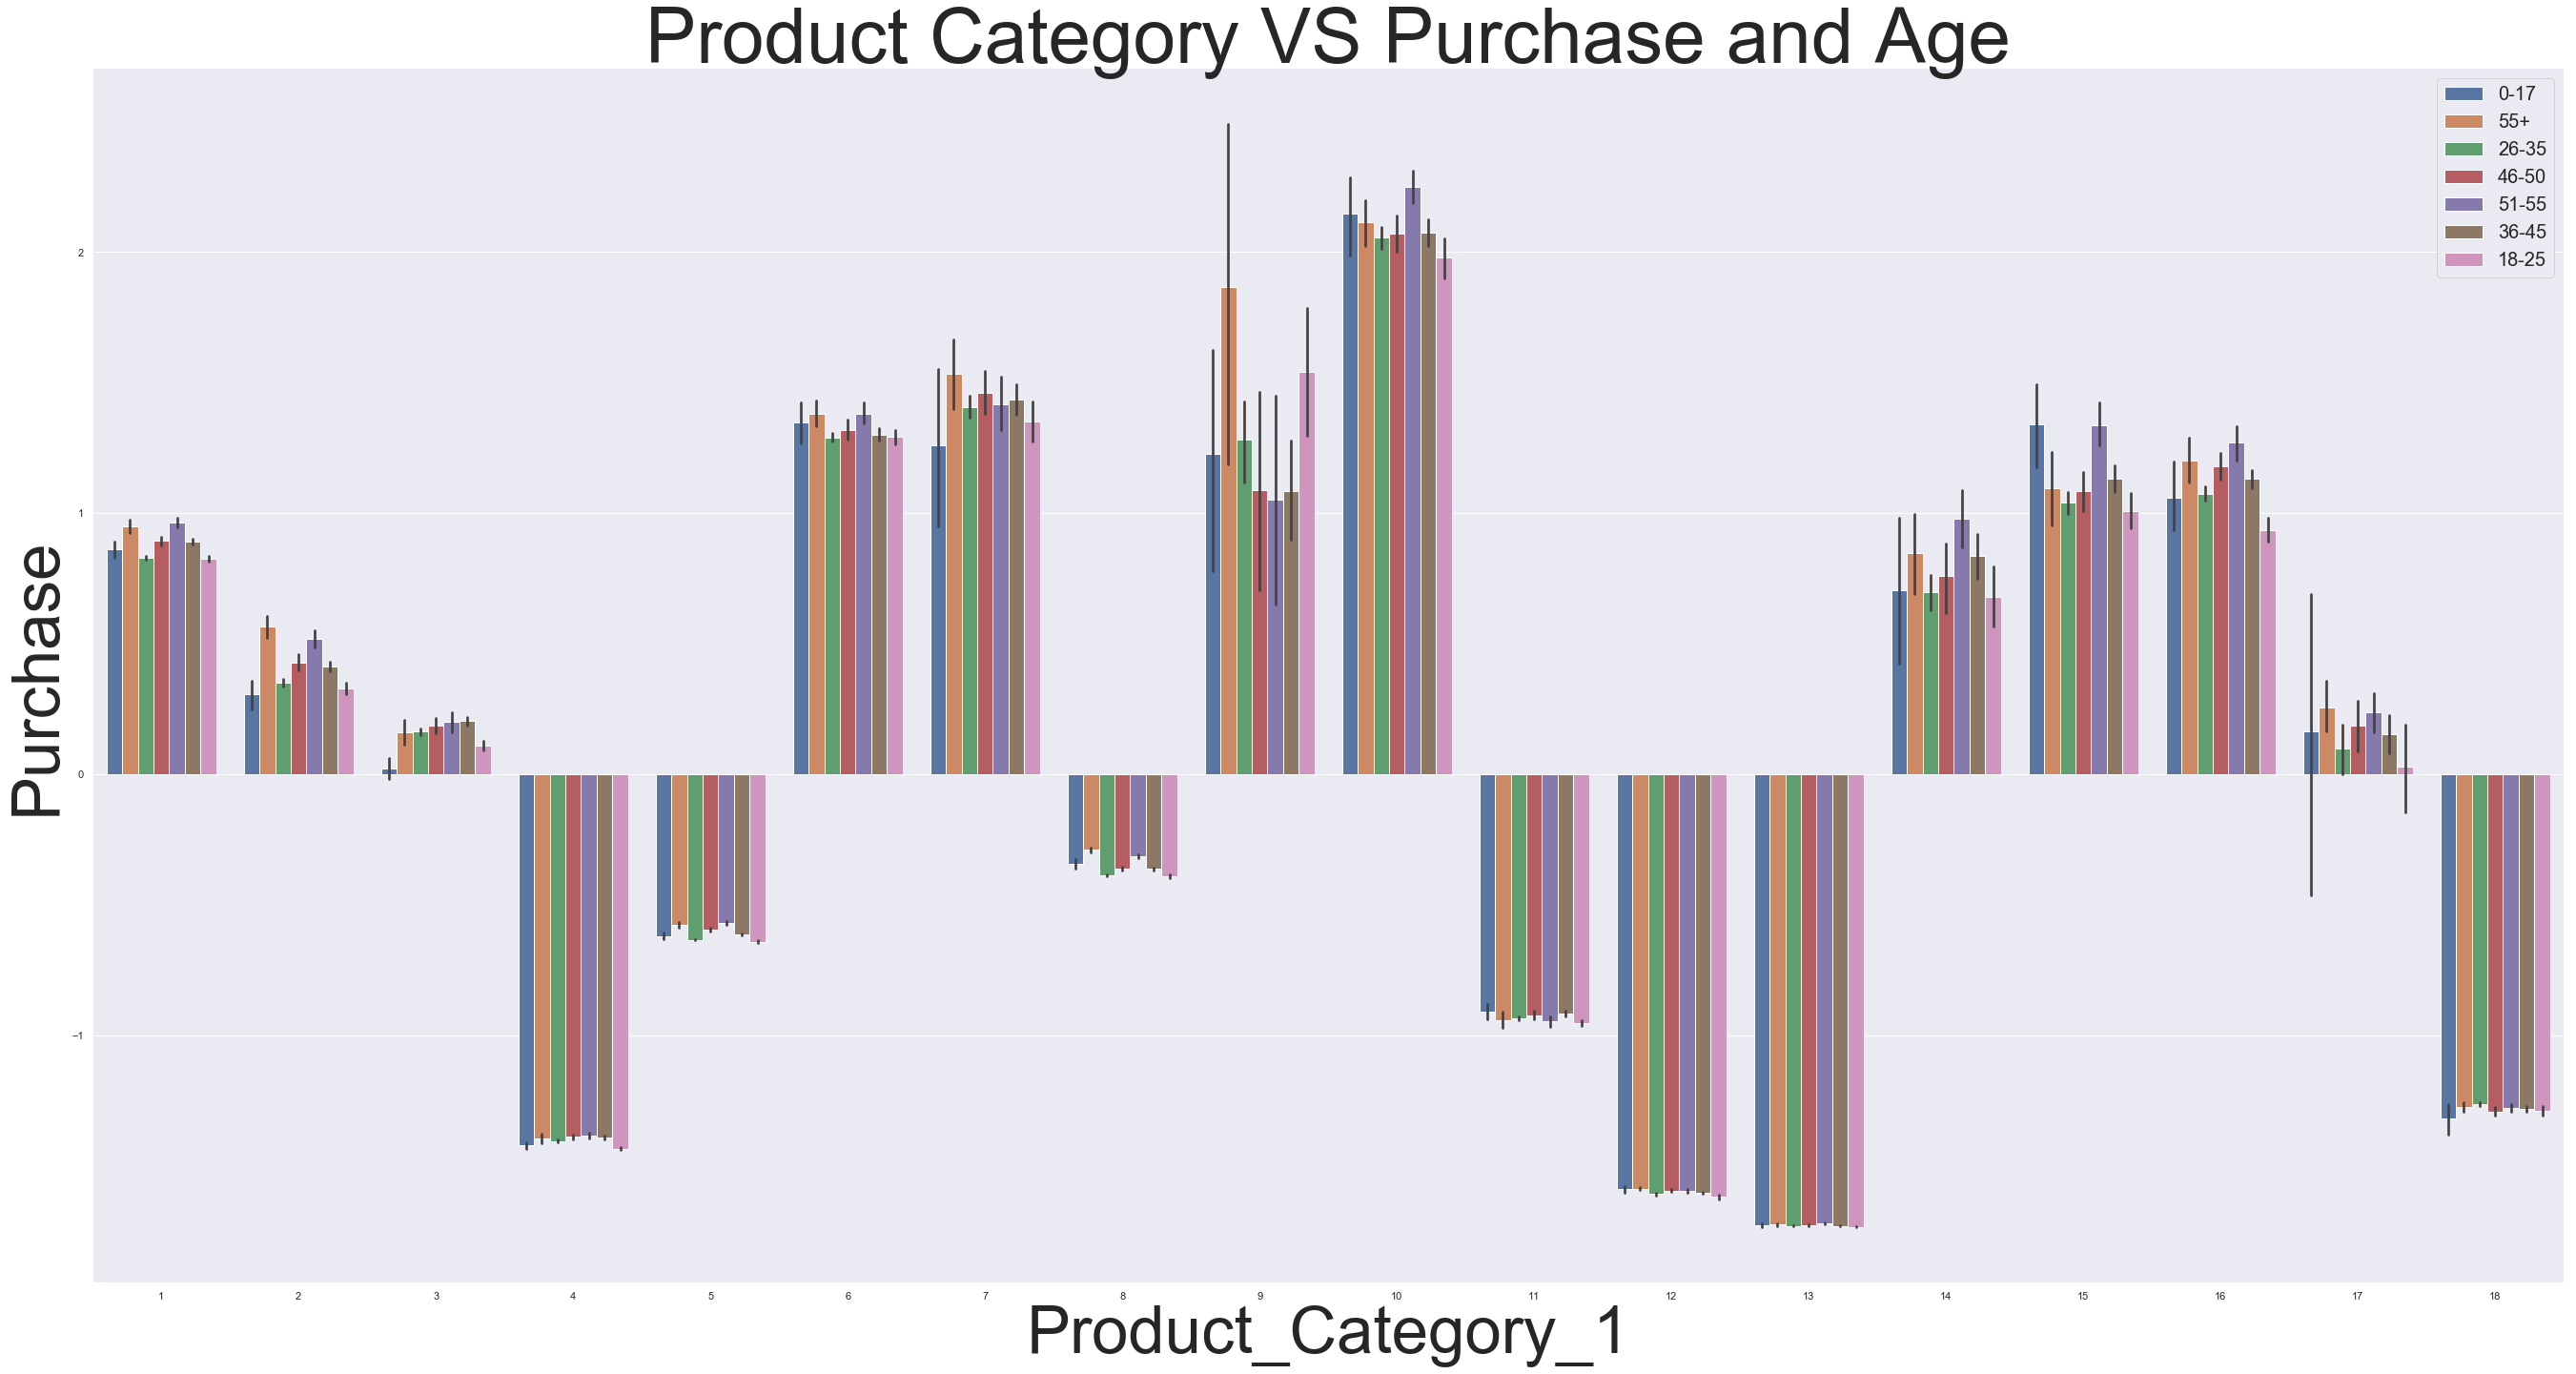

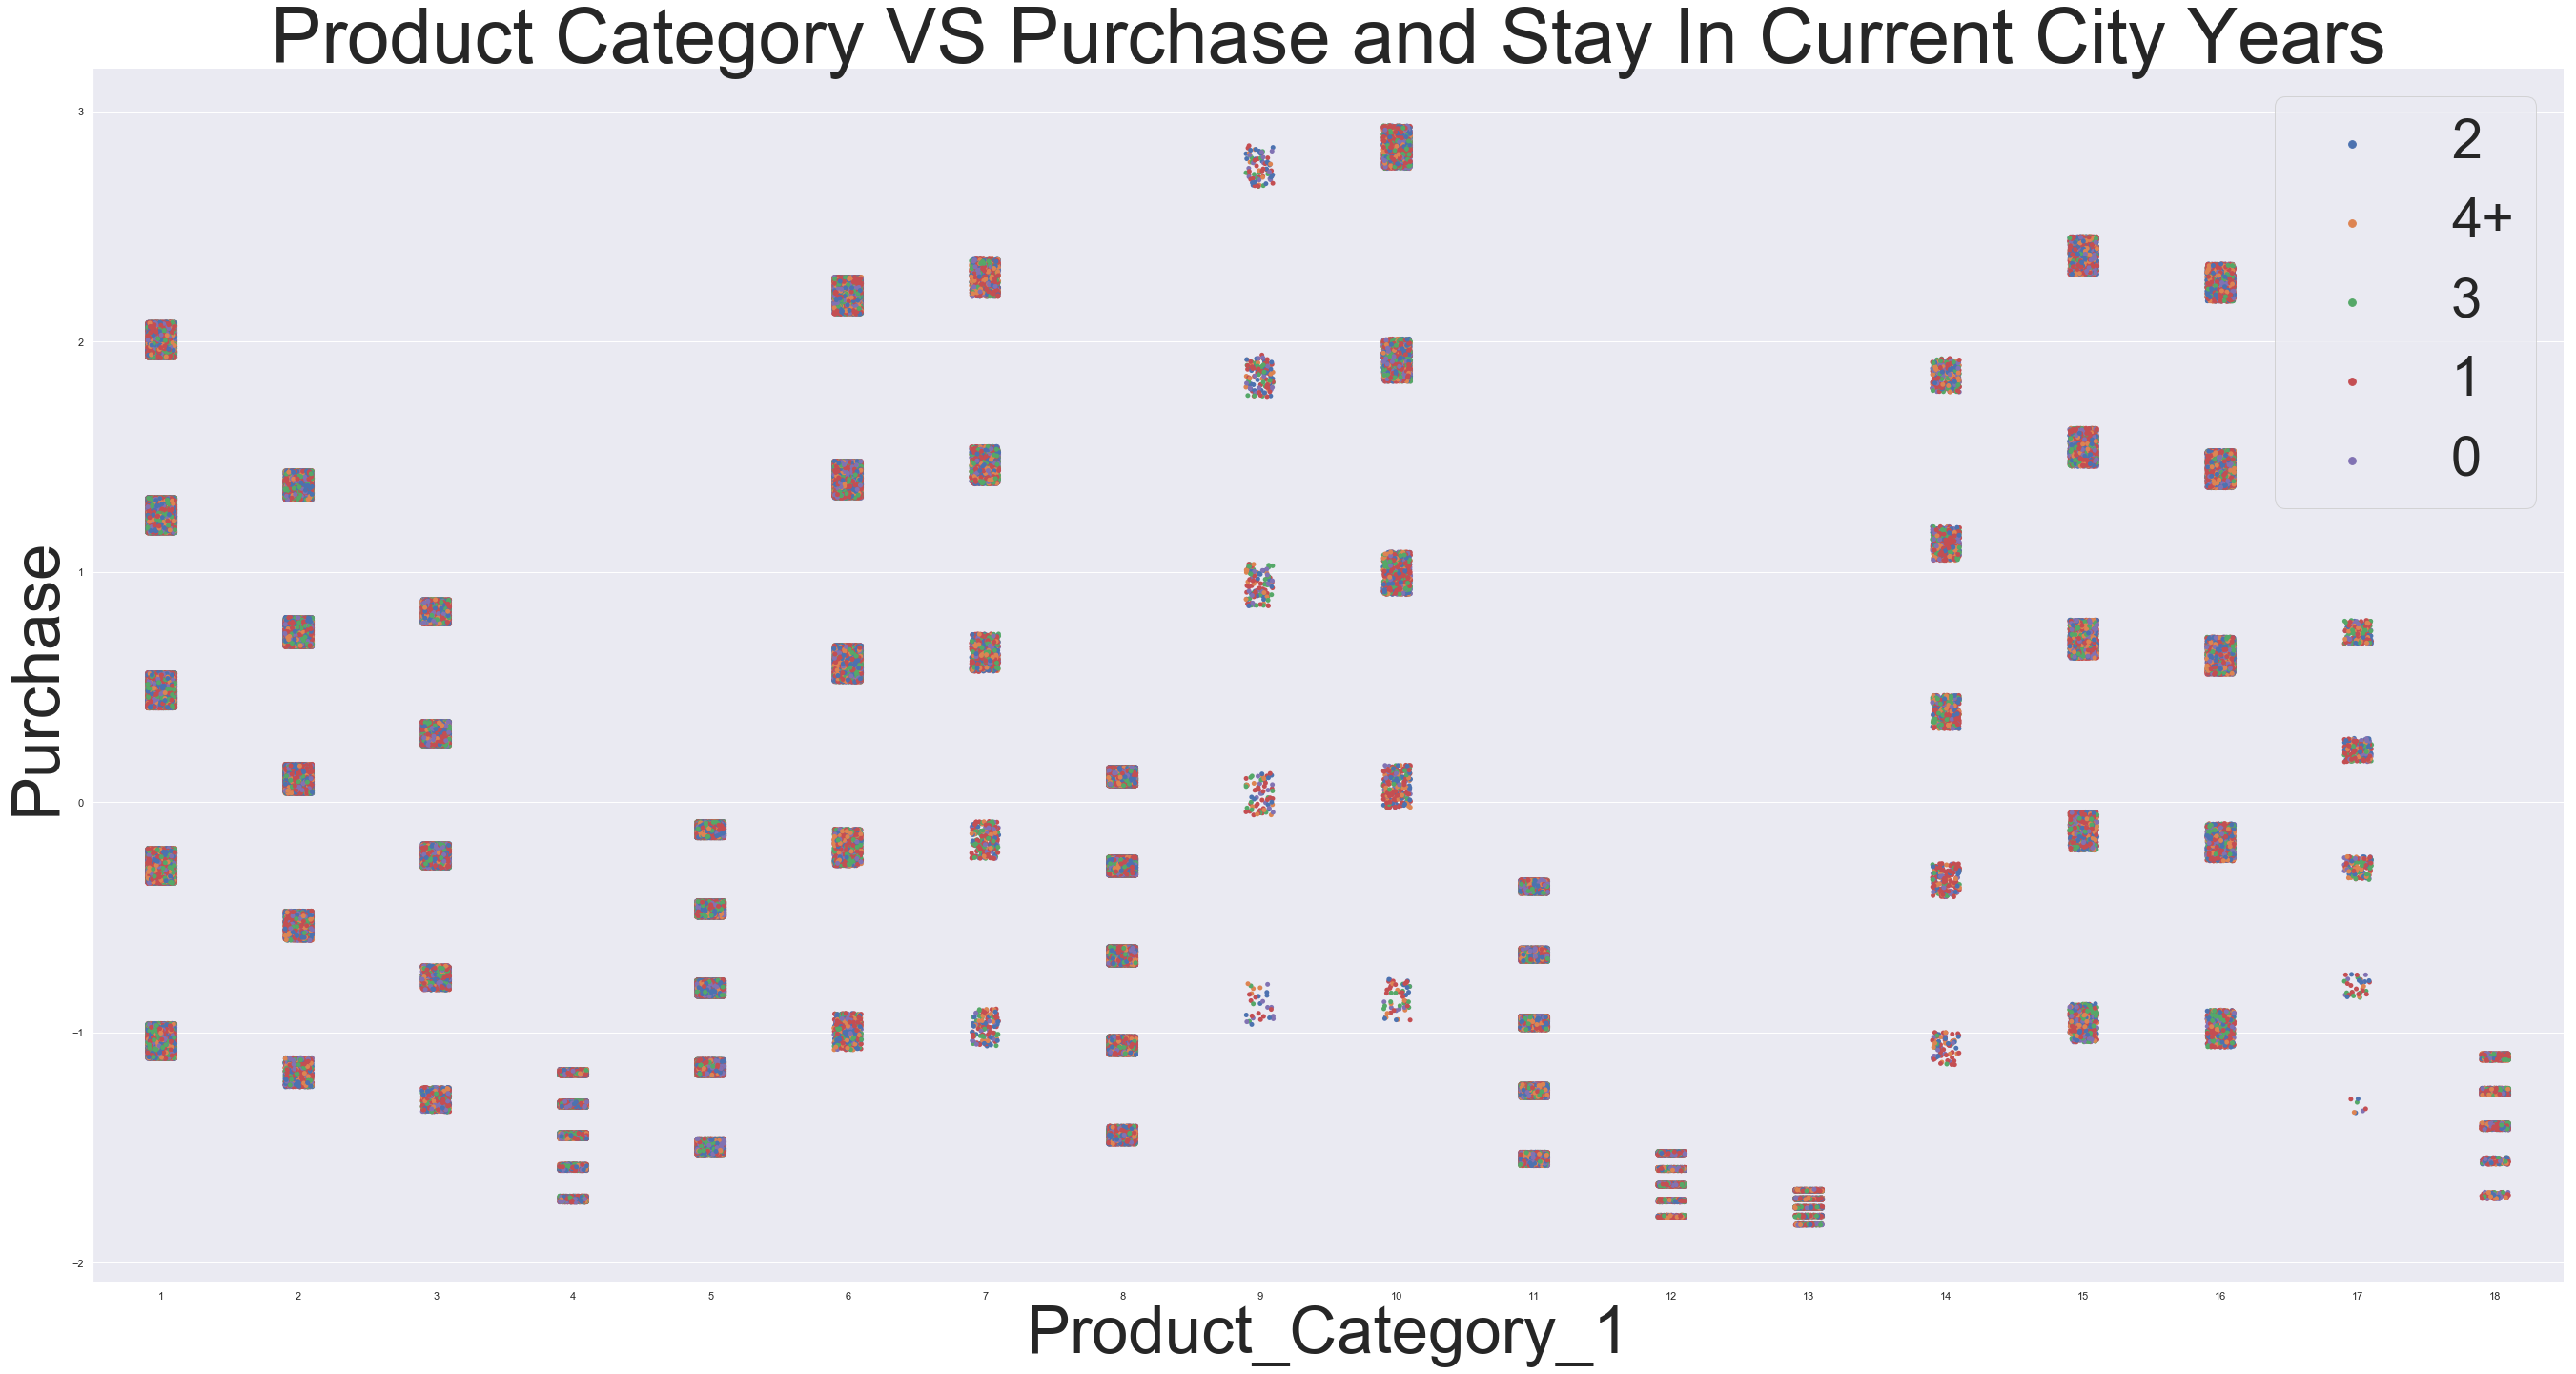

In [107]:
# Now let's use the category plot to visulize 'Product_Category_1' and 'Purchase' with different features


sns.catplot(x="Product_Category_1", y="Purchase", hue='Gender' , kind='violin', legend_out=False, height=22, aspect=22/12, data=data)
plt.title('Product Category VS Purchase and Gender',{'fontsize':80})
plt.legend(fontsize='xx-small',loc=1)
sns.catplot(x='Product_Category_1',y='Purchase', hue='Age' , kind='bar',legend_out=False,height=22,aspect=22/12, data=data)
plt.title('Product Category VS Purchase and Age',{'fontsize':80})
plt.legend(fontsize=20,loc=1)
sns.catplot(x='Product_Category_1',y='Purchase', hue='Stay_In_Current_City_Years' ,legend_out=False, height=22, aspect=22/12, data=data)
plt.title('Product Category VS Purchase and Stay In Current City Years',{'fontsize':80})
plt.legend(fontsize='xx-small',loc=1)


In [ ]:
sns.catplot(x='Product_Category_1', y="Purchase", hue='Gender',row='Age', kind='violin',legend_out=False,height=11, aspect=22/12, data=data)
plt.legend(fontsize=20,loc=1)
#sns.catplot(x='Product_Category_1', y="Purchase", hue='City_Category',col='Marital_Status', kind='bar',legend_out=False,height=22, aspect=22/12, data=data)
#plt.legend(fontsize=20,loc=1)



KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10ae1c378> (for post_execute):


ValueError: object too deep for desired array

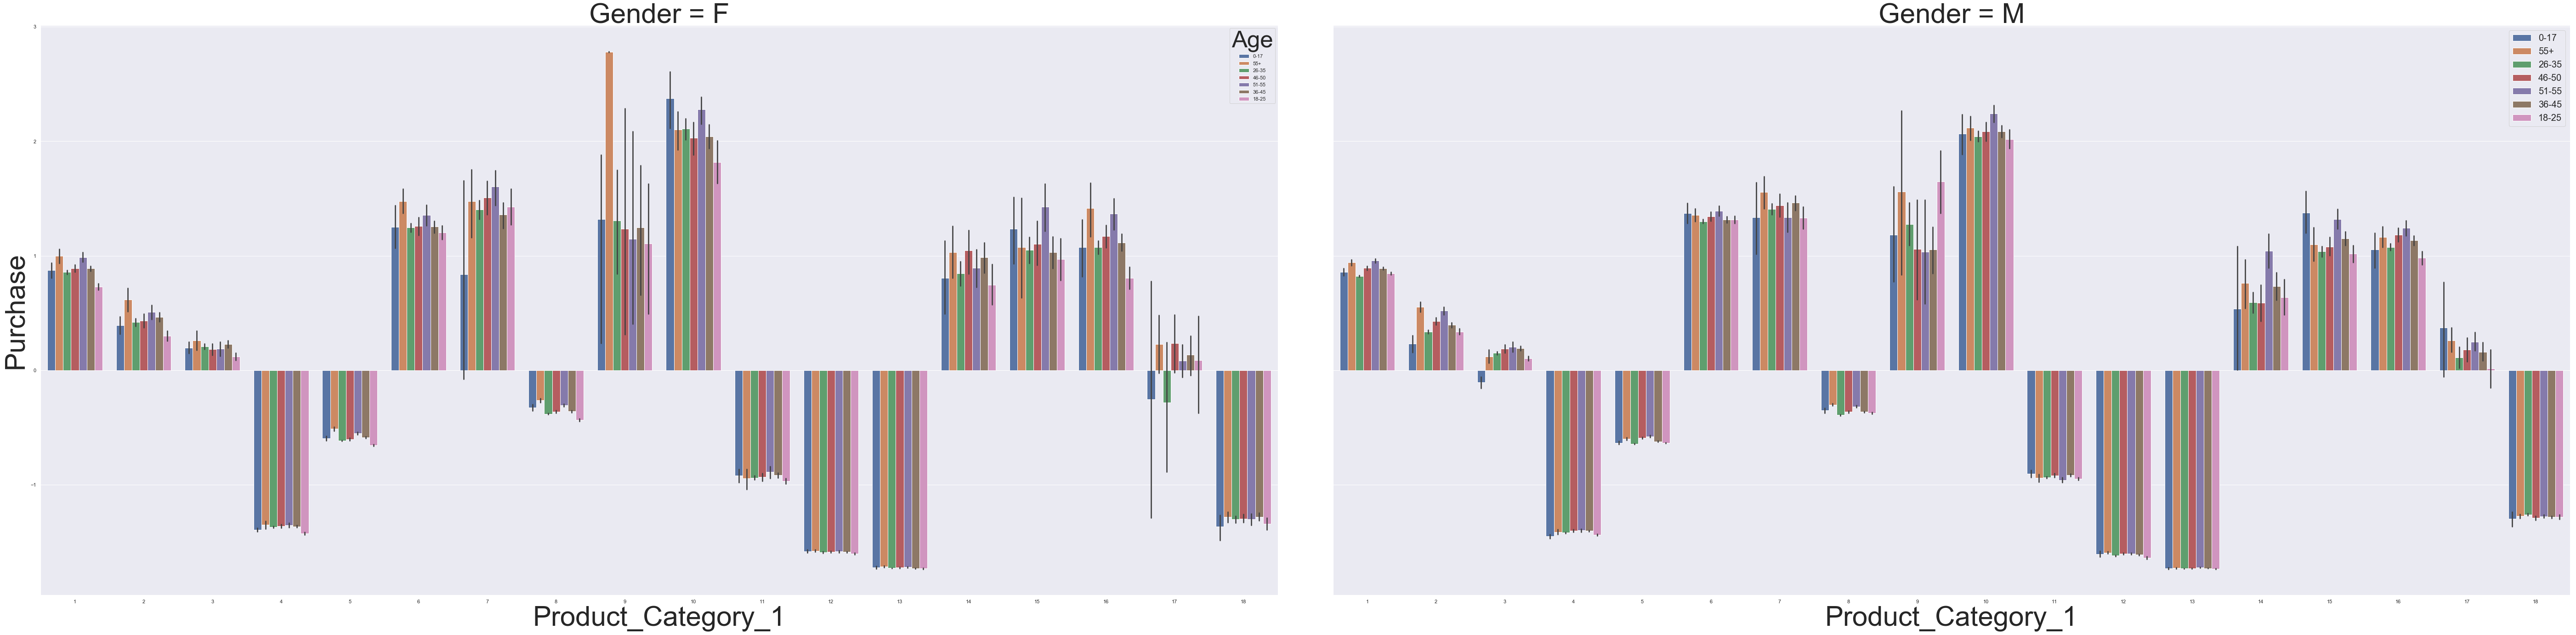

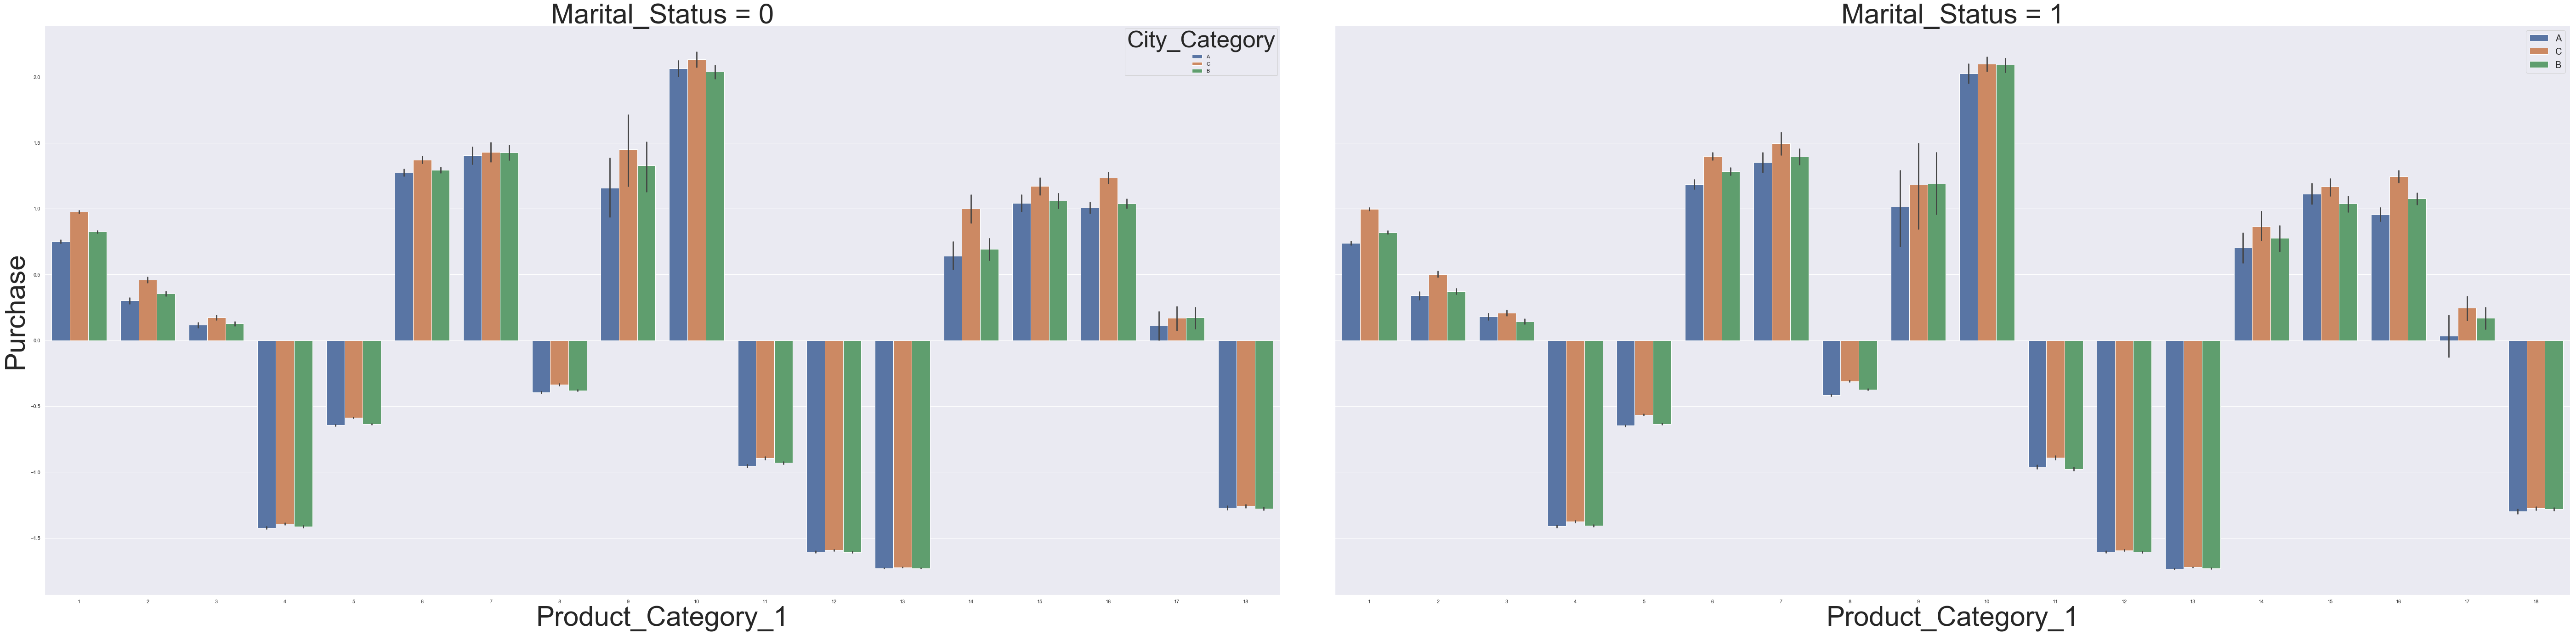

In [133]:
sns.catplot(x='Product_Category_1', y="Purchase", hue='Age',col='Gender', kind='bar',legend_out=False,height=22, aspect=22/12, data=data)
plt.legend(fontsize=20,loc=1)

sns.catplot(x='Product_Category_1', y="Purchase", hue='City_Category',col='Marital_Status', kind='bar',legend_out=False,height=22, aspect=22/12, data=data)
plt.legend(fontsize=20,loc=1)


# DecisionTreeClassifier

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=18)
clf_entropy.fit(x_train,y_train)

y_prediction=clf_entropy.predict(x_test)
print("Decision Tree accuracy is :", accuracy_score(y_test, y_prediction)*100)

Decision Tree accuracy is : 78.1762714386696


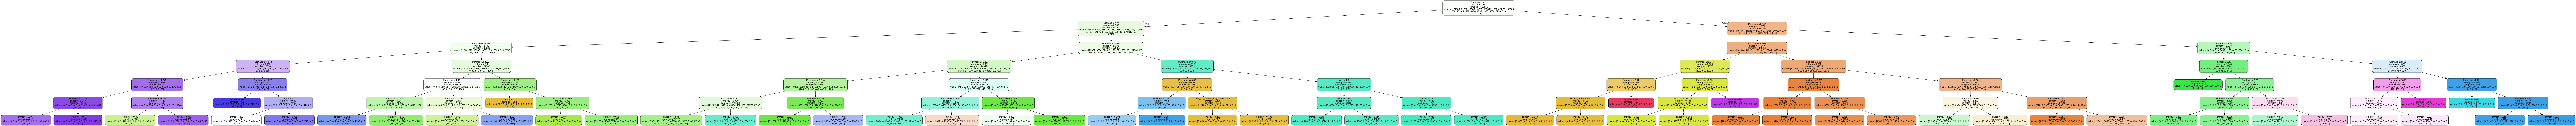

In [166]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
data_feature_names=['Occupation','Marital_Status','Purchase','Gender','Age','City_Category','Stay_In_Current_City_Years']
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data, filled=True, feature_names=data_feature_names,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# KNeighborsClassifier

In [179]:
#from decision tree and above figures we can see we can only keep 'Purchase' when we try to use KNN to classify 'Product_Category_1'

from sklearn.neighbors import KNeighborsClassifier

X = data.iloc[:,11].values.reshape(-1,1) 
y = data.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(X,y, random_state=100, test_size=0.1)

In [180]:
# decide the number of neighbors in KNN
import math
math.sqrt(len(y_train))

695.5709884691856

In [181]:
classifier=KNeighborsClassifier(n_neighbors=695, p=18, metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=695, p=18,
           weights='uniform')

In [182]:
y_pred=classifier.predict(x_test)
print('KNeighborsClassifier accuracy is:', accuracy_score(y_test, y_pred)*100)

KNeighborsClassifier accuracy is: 86.08393169388742
